In [ ]:
import json

with open("./params.json", mode = "r", encoding = "utf-8") as f:
    data = json.load(f)
    model_path = data["model_path"]
    dataset_path_train = data["dataset_path"]["train"]
    dataset_path_test = data["dataset_path"]["test"]
    num_single_sample_timesteps = data["num_single_sample_timesteps"]
    input_window_length = data["input_window_length"]
    label_window_length = data["label_window_length"]
    input_features = data["input_features"]
    label_features = data["label_features"]

    # Usually window_stride = 1 since we want to check each input window
    window_stride = 20
    seed_val = 0

In [ ]:
import torch
import random
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(seed_val)
random.seed(seed_val)
np.random.seed(seed_val)

In [ ]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from utils.pipeline.Model import TimeSeriesHuggingFaceTransformer
from utils.pipeline.Data import get_mean_std_respected_temporal, WindowedIterableDataset
from utils.pipeline.Run import autoregress

In [10]:
# stats = get_mean_std_respected_temporal(
#     dataset_path = dataset_path_train,
#     cols = input_features
# )

stats = get_mean_std_respected_temporal(
    dataset_path = dataset_path_train,
    cols = input_features,
    num_single_sample_timesteps = num_single_sample_timesteps,
    input_window_len = input_window_length,
    label_window_len = label_window_length,
    window_stride = window_stride
)

# print(stats)

df_test = WindowedIterableDataset(
    dataset_path = dataset_path_test,
    stats = stats,
    input_features = input_features,
    label_features = label_features,
    num_single_sample_timesteps = num_single_sample_timesteps,
    stride = window_stride,
    input_window_length = input_window_length,
    label_window_length = label_window_length,
    inference = True
)

data_loader_test = DataLoader(
    df_test,
    batch_size = 1,    # One windowed datapoint at a time
    pin_memory = True
)

## Prediction

In [11]:
model = torch.load(model_path, weights_only = False).to(device)
model.eval()

TimeSeriesHuggingFaceTransformer(
  (shared): Embedding(1, 128)
  (encoder): T5Stack(
    (embed_tokens): Linear(in_features=5, out_features=128, bias=True)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=128, out_features=128, bias=False)
              (k): Linear(in_features=128, out_features=128, bias=False)
              (v): Linear(in_features=128, out_features=128, bias=False)
              (o): Linear(in_features=128, out_features=128, bias=False)
              (relative_attention_bias): Embedding(64, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=128, out_features=64, bias=False)
              (wo): Linear(in_features=64, out_features=128, bias=False)
  

457it [00:00, 4565.13it/s, single_test_loss=0.560486]

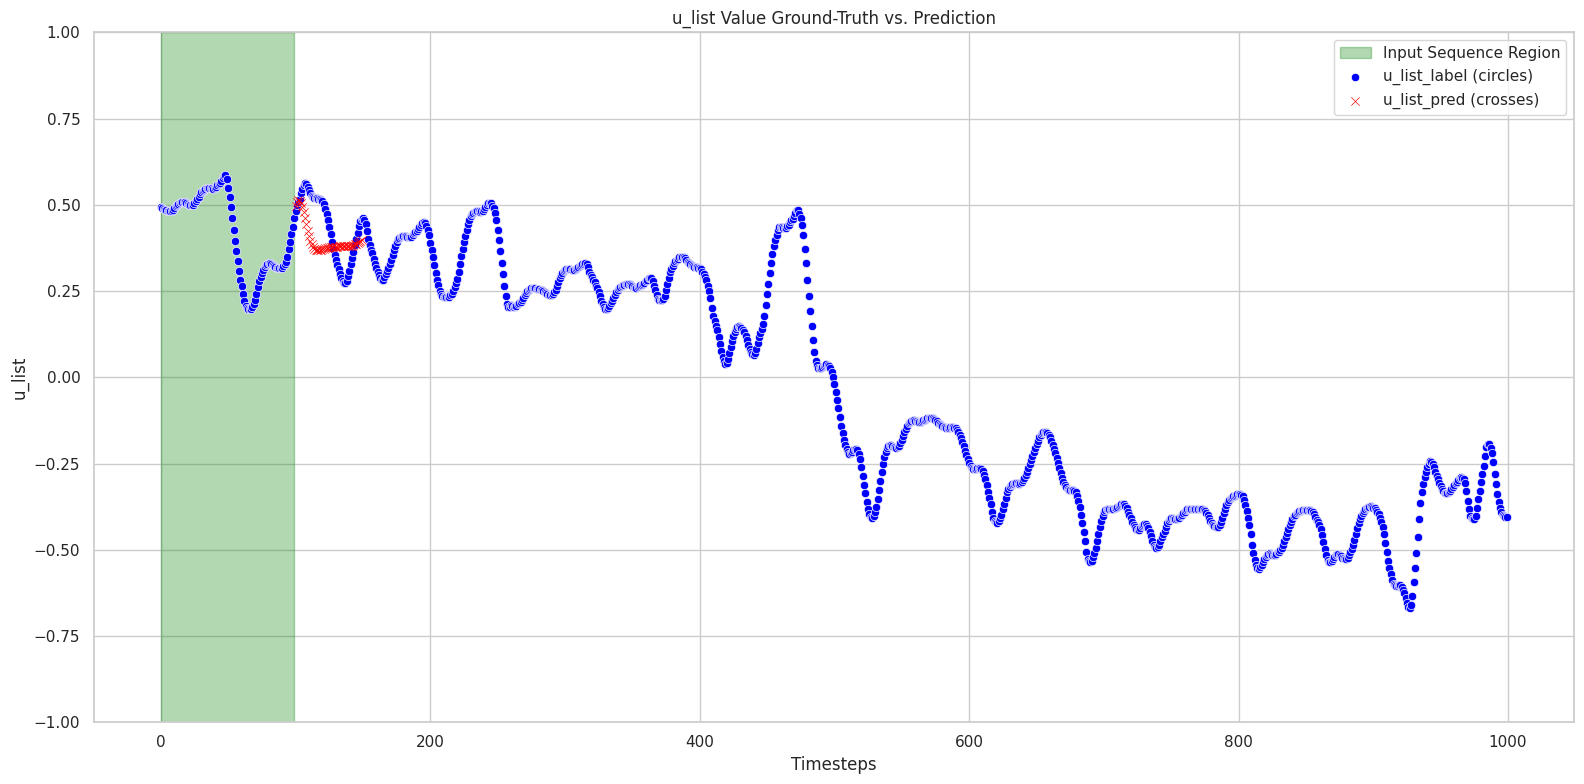

457it [00:00, 4565.13it/s, single_test_loss=0.563332]

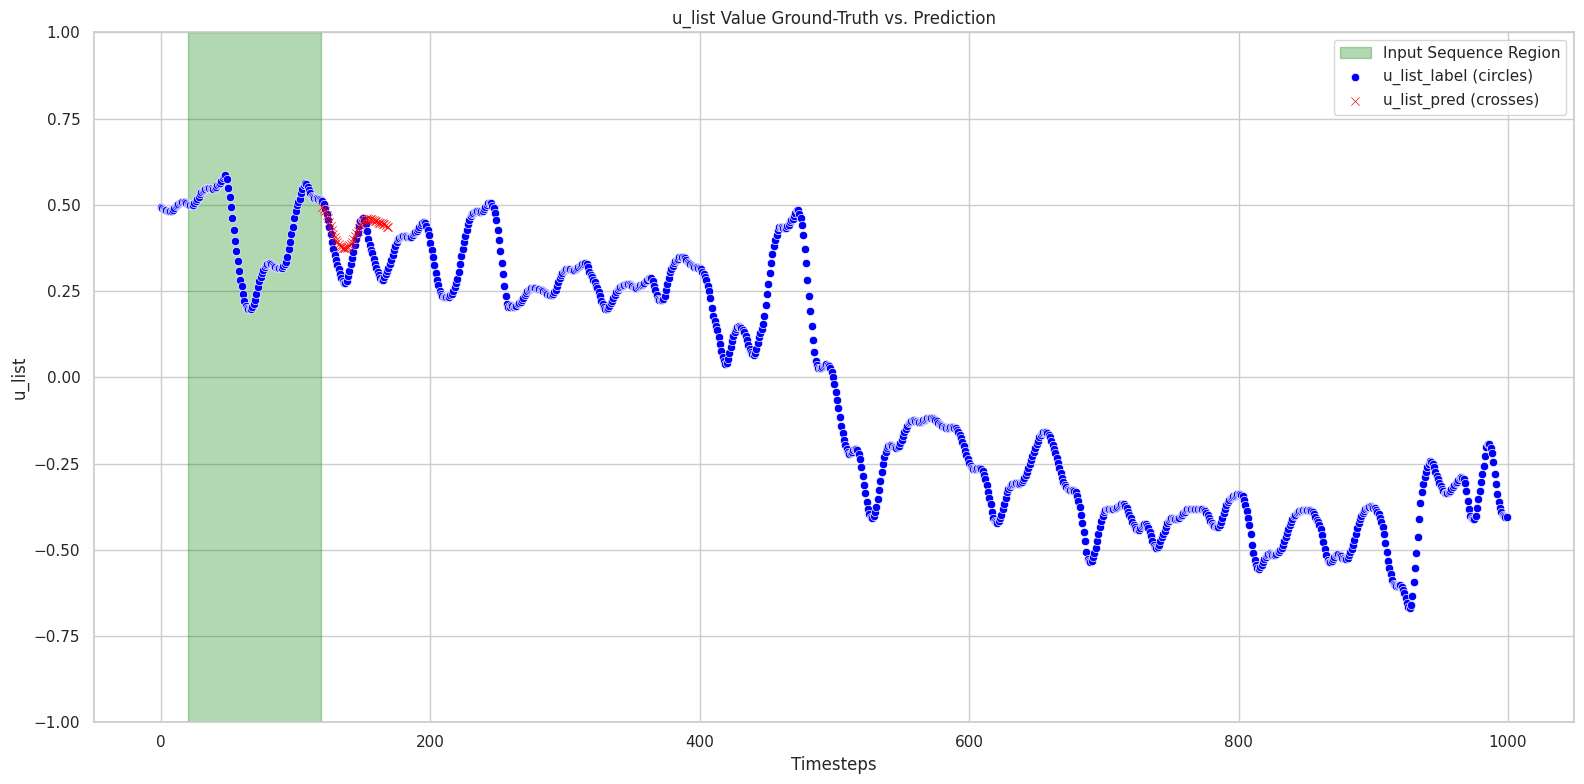

457it [00:00, 4565.13it/s, single_test_loss=0.932511]

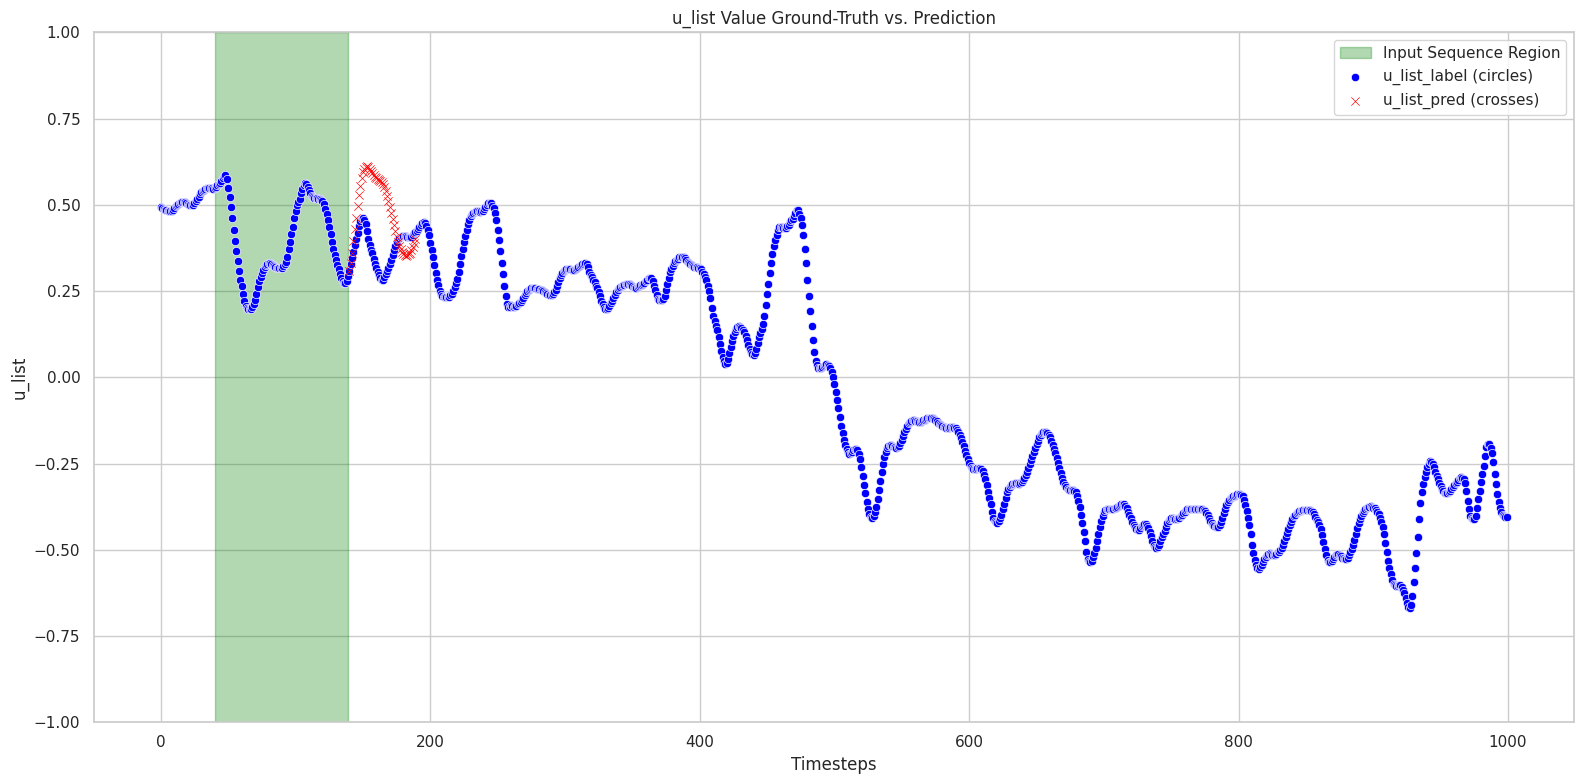

457it [00:01, 4565.13it/s, single_test_loss=0.210361]

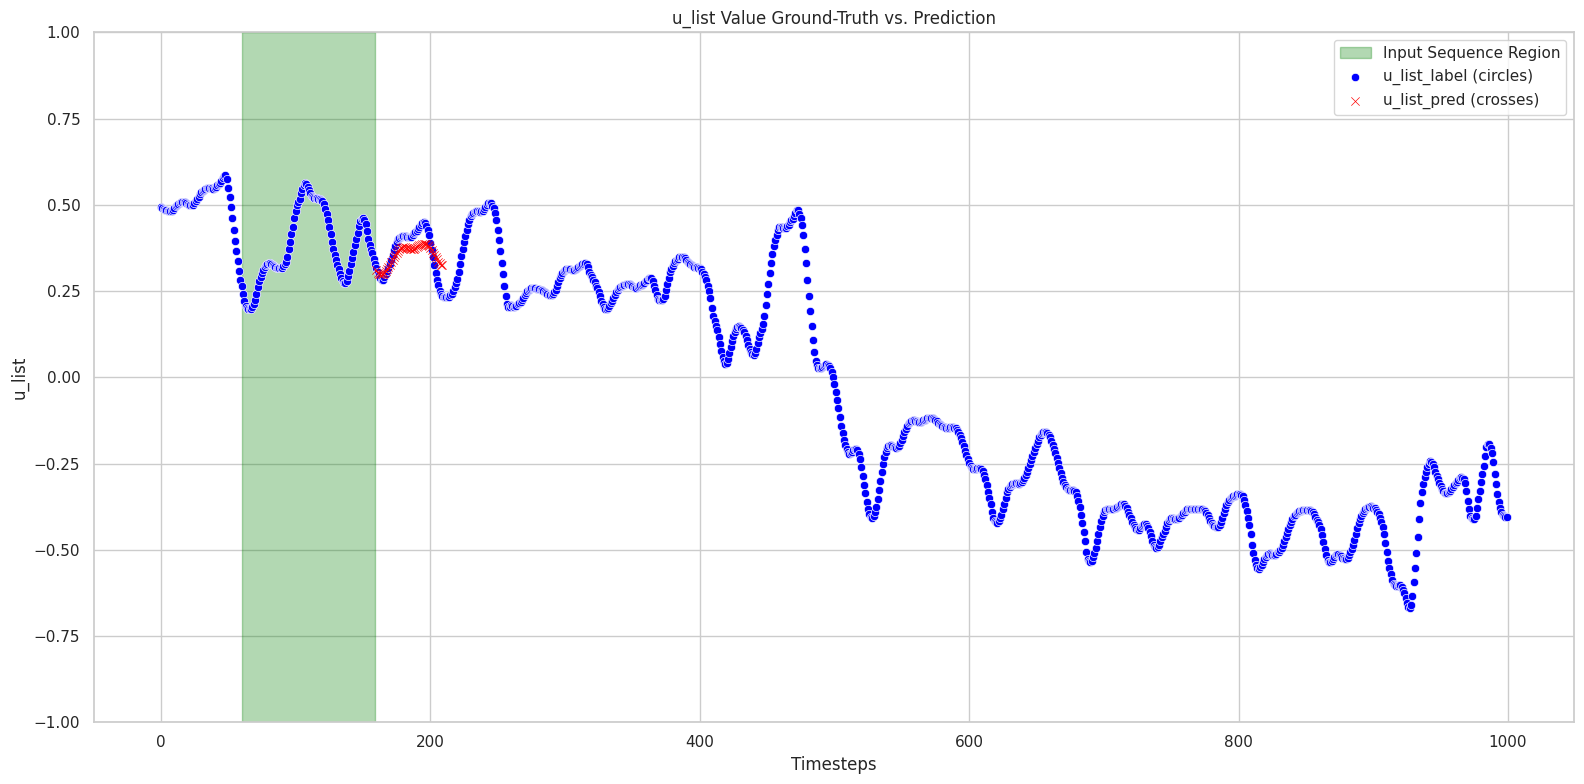

457it [00:01, 4565.13it/s, single_test_loss=0.398827]

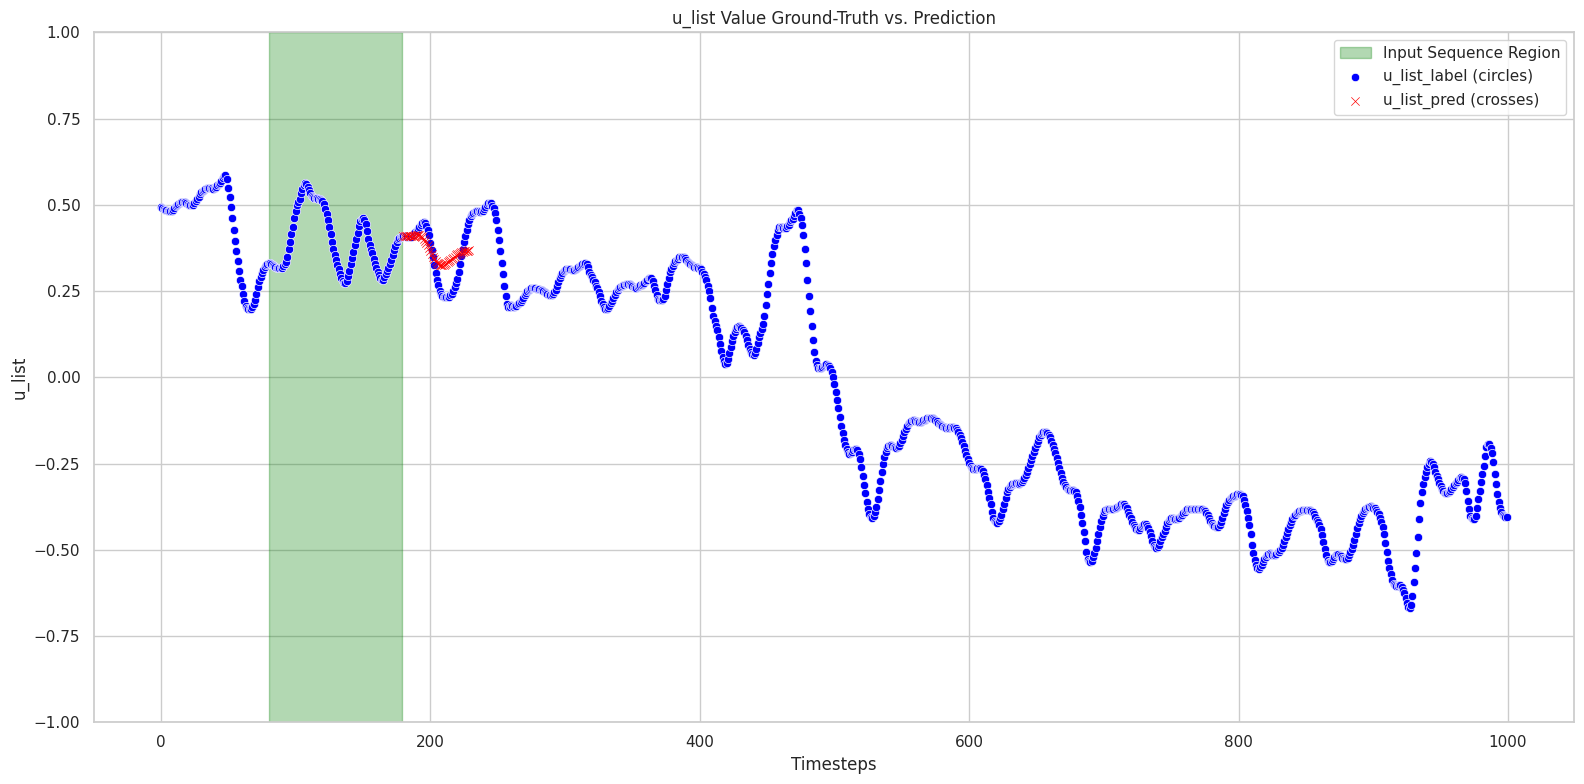

457it [00:01, 4565.13it/s, single_test_loss=0.426886]

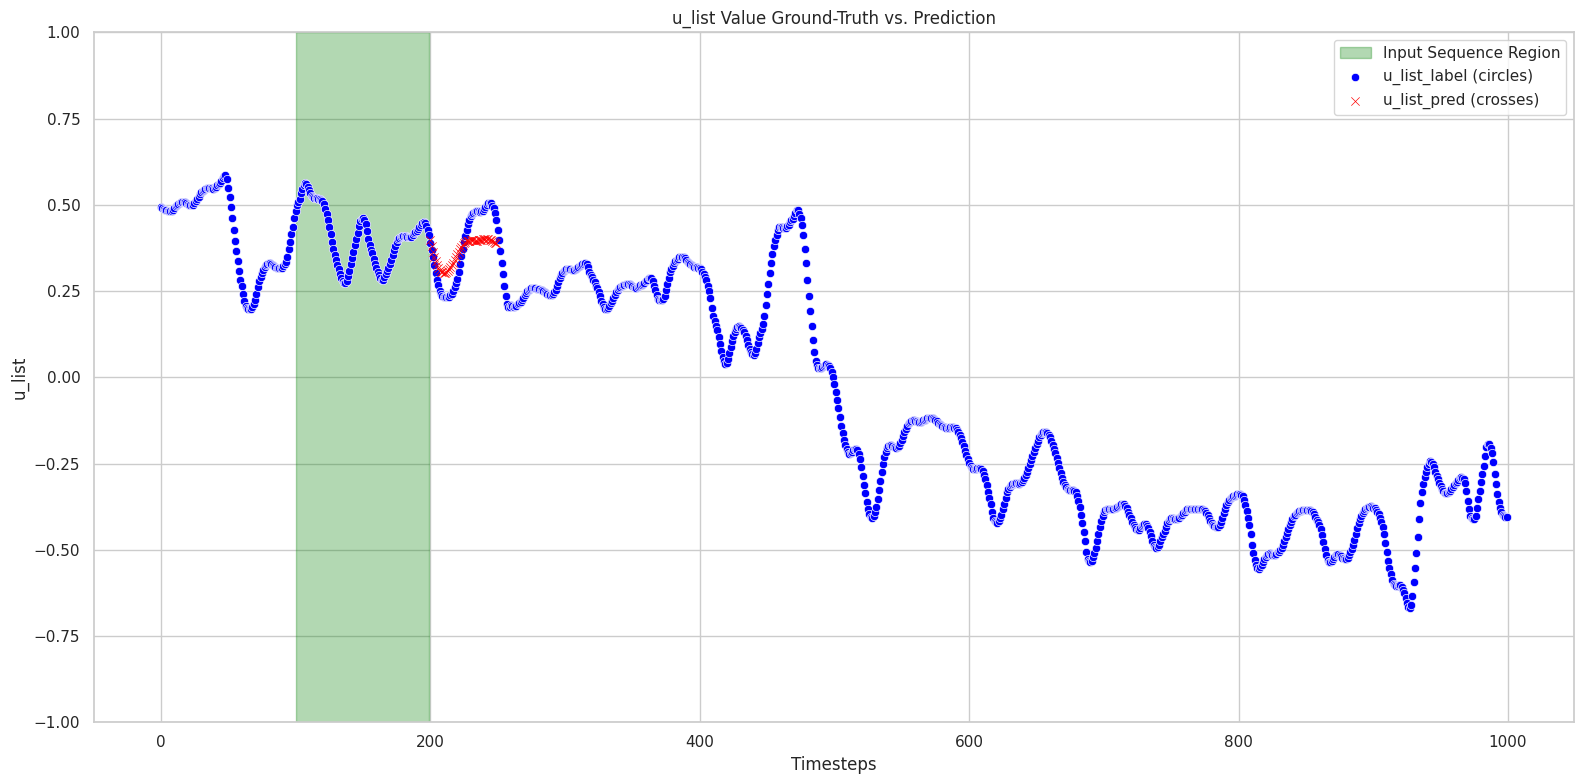

457it [00:02, 4565.13it/s, single_test_loss=0.500240]

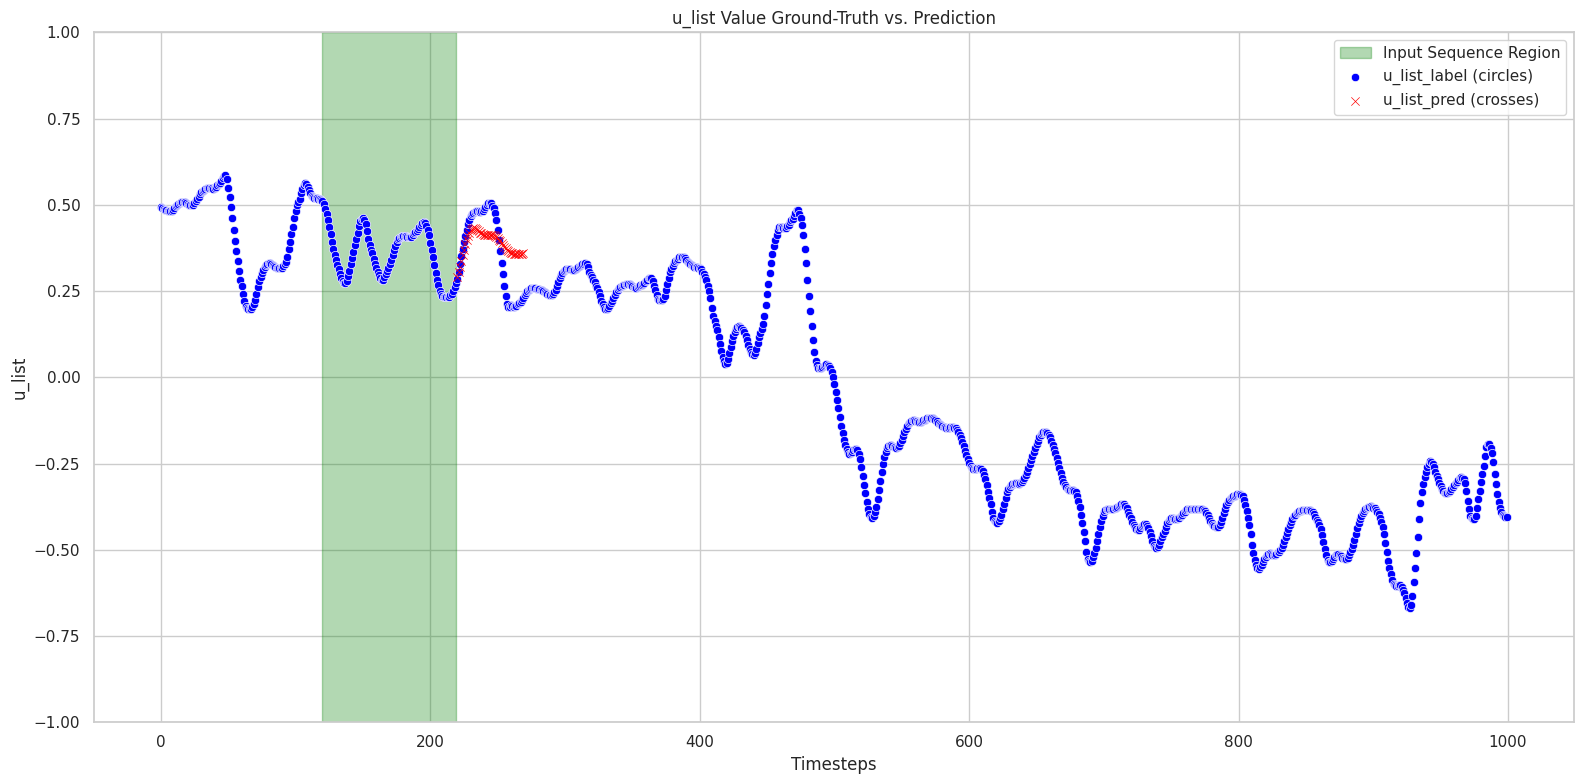

457it [00:02, 4565.13it/s, single_test_loss=0.146473]

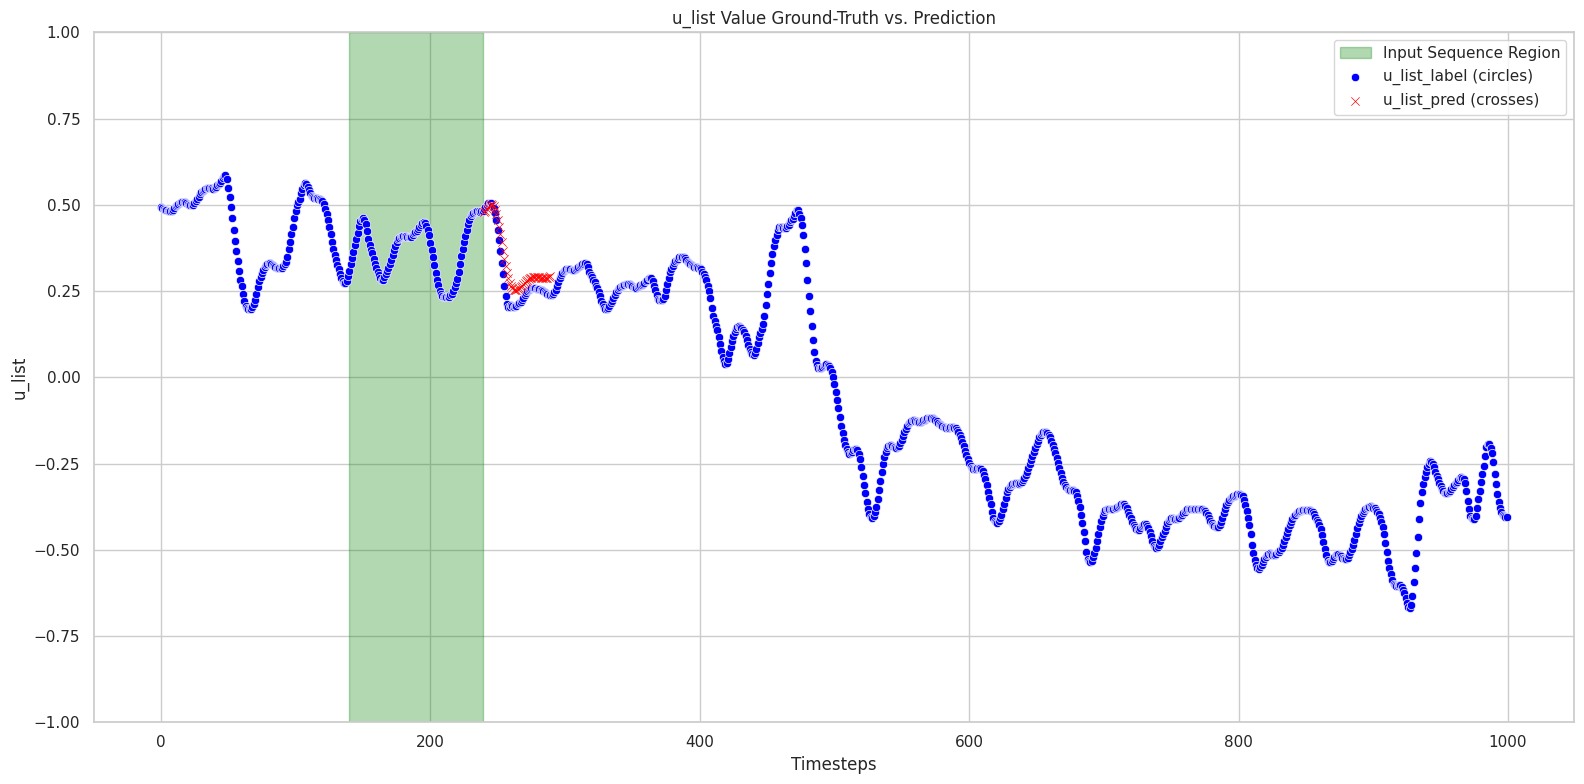

457it [00:02, 4565.13it/s, single_test_loss=0.513418]

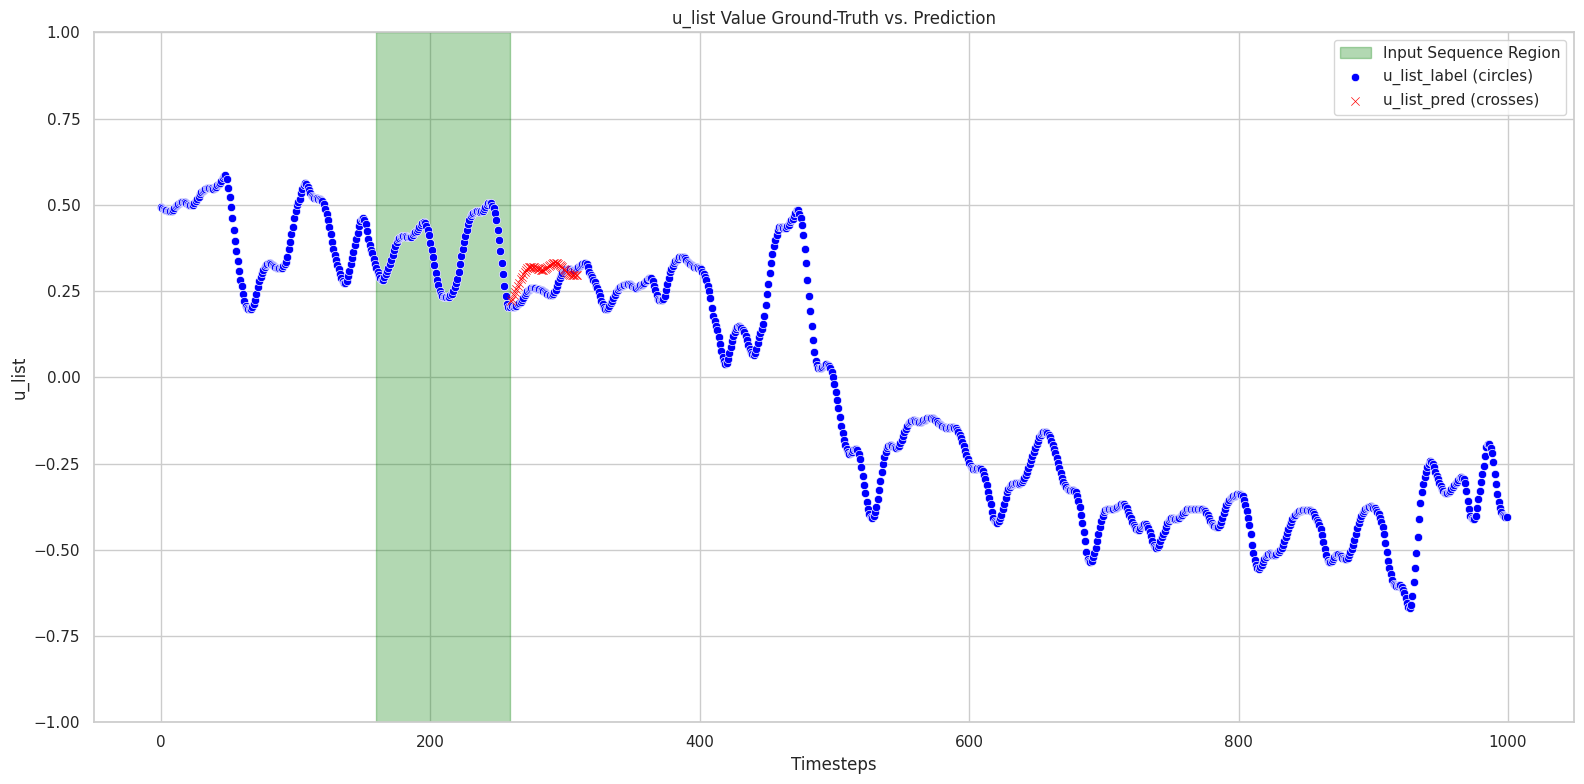

457it [00:03, 4565.13it/s, single_test_loss=0.469012]

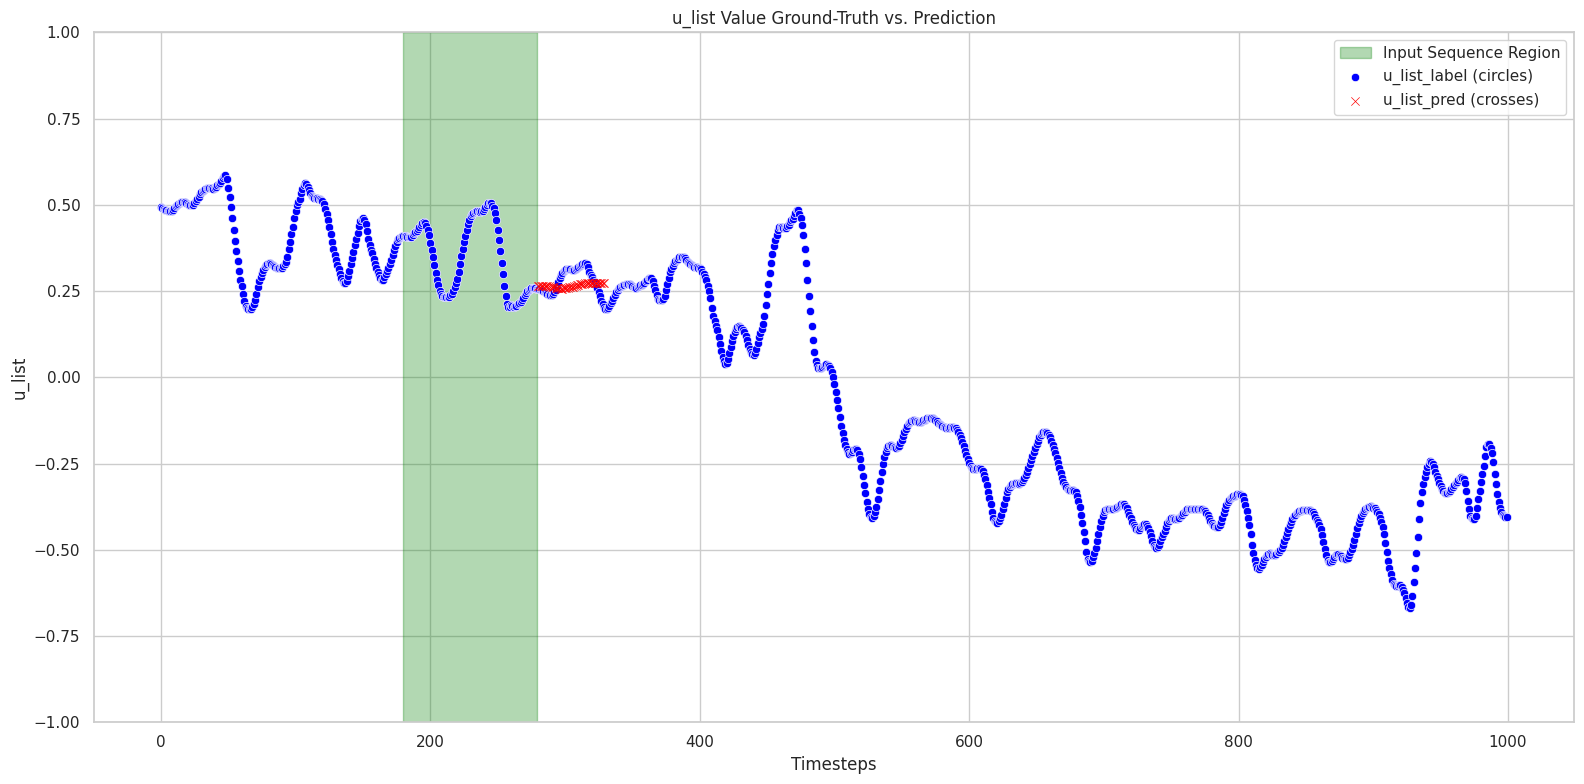

457it [00:03, 4565.13it/s, single_test_loss=0.181525]

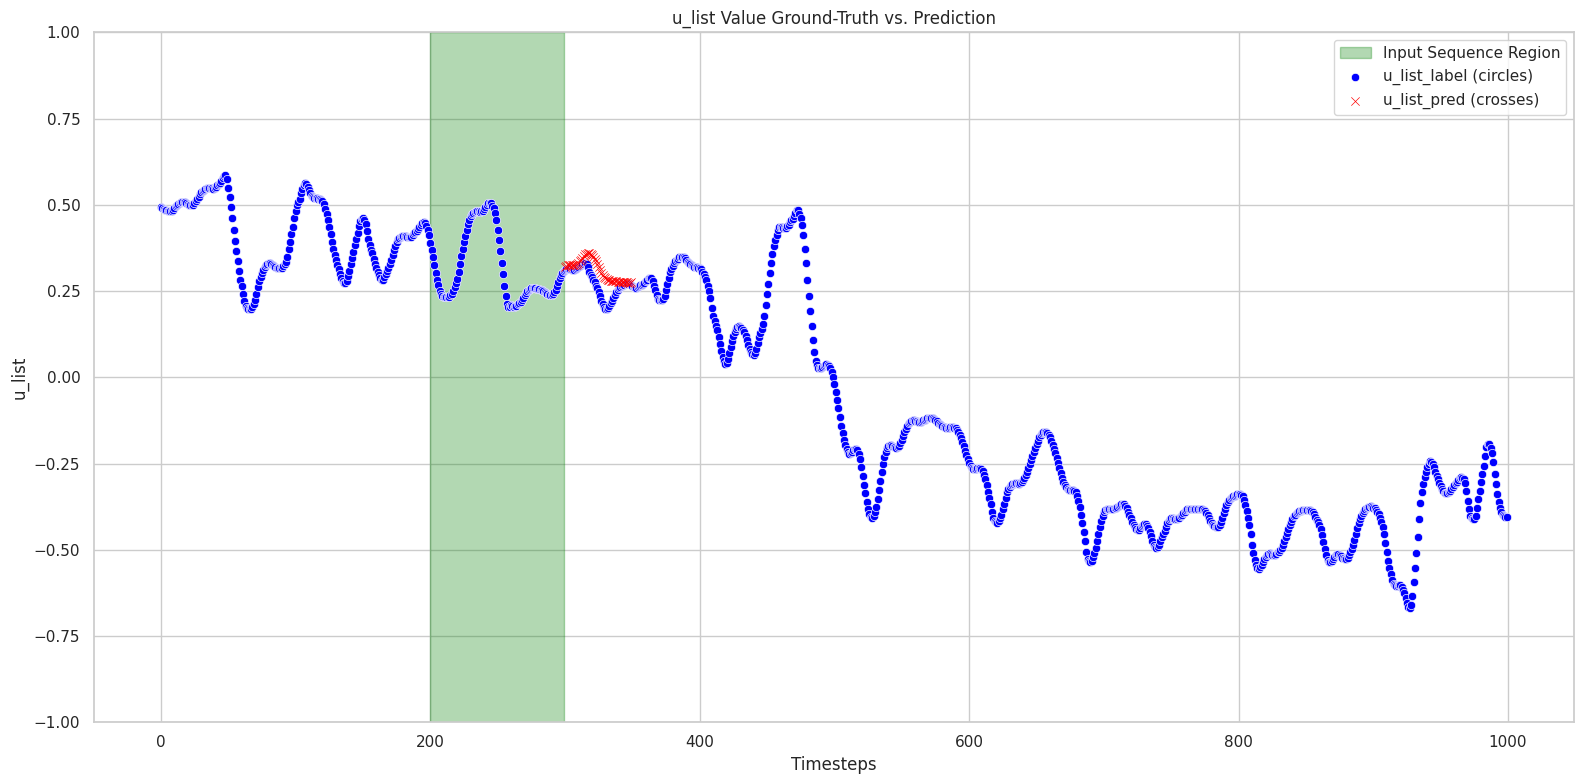

457it [00:03, 4565.13it/s, single_test_loss=0.114659]

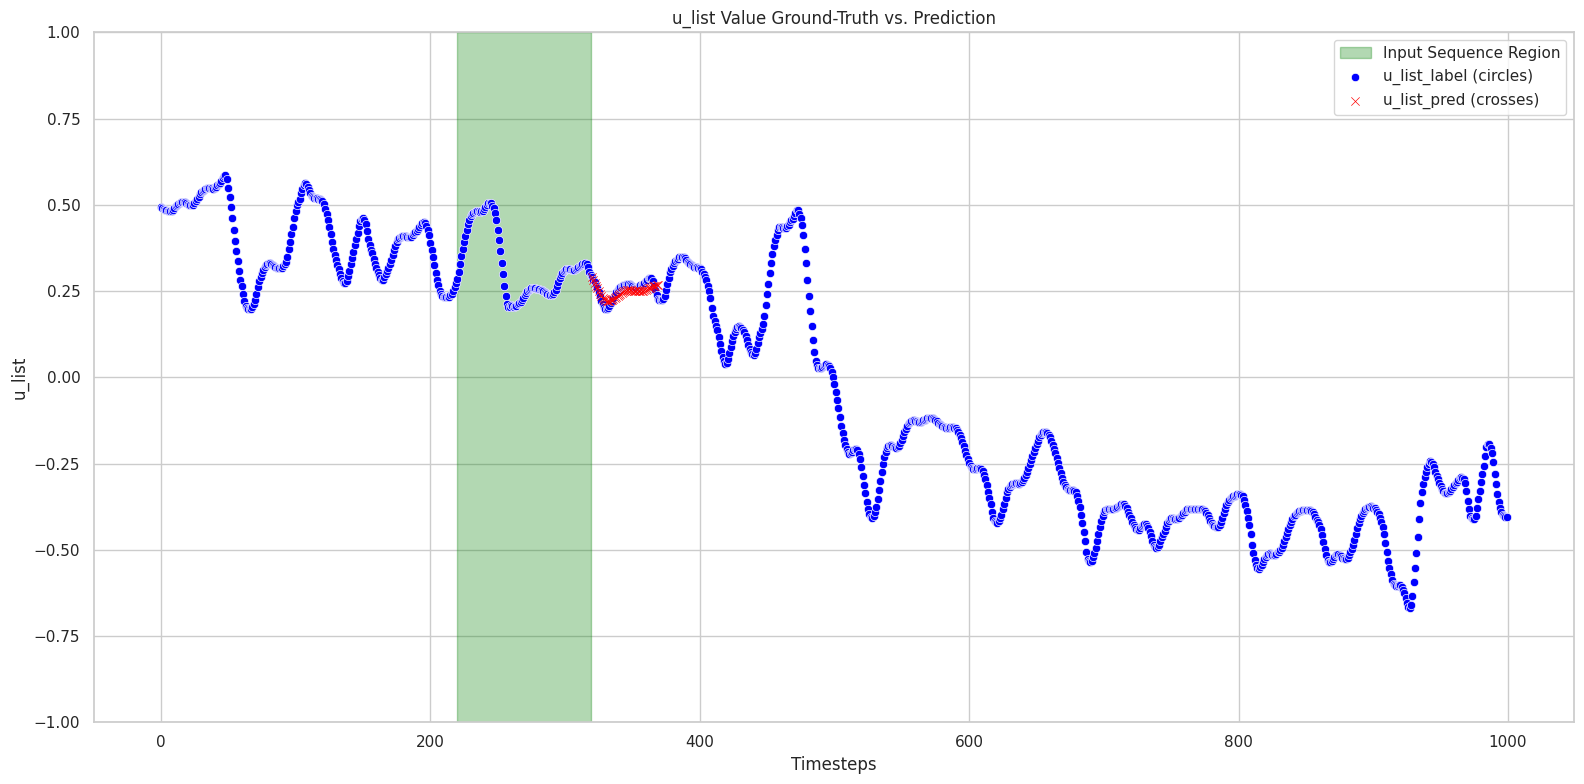

457it [00:04, 4565.13it/s, single_test_loss=0.272982]

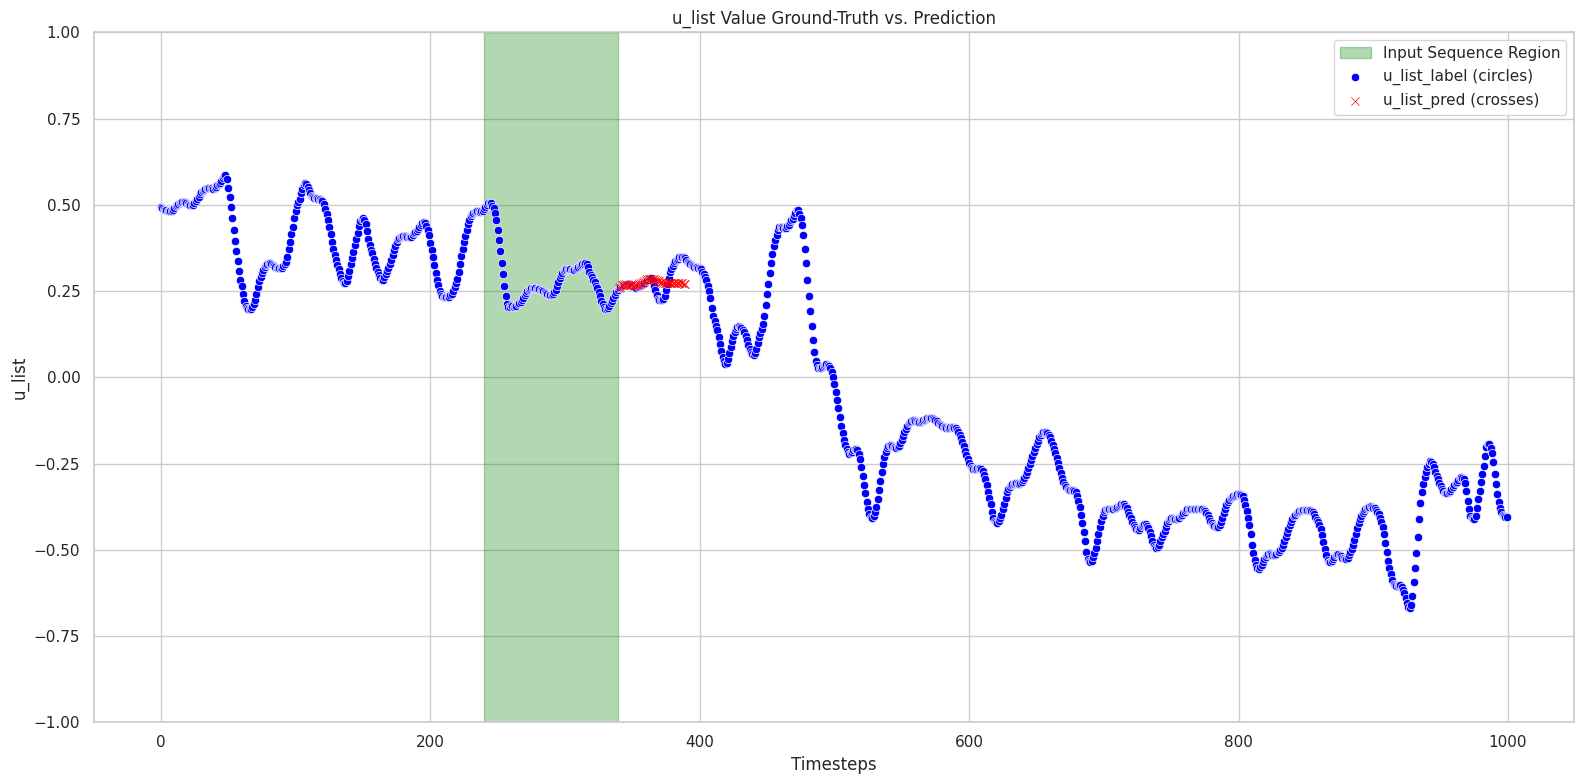

457it [00:04, 4565.13it/s, single_test_loss=0.549442]

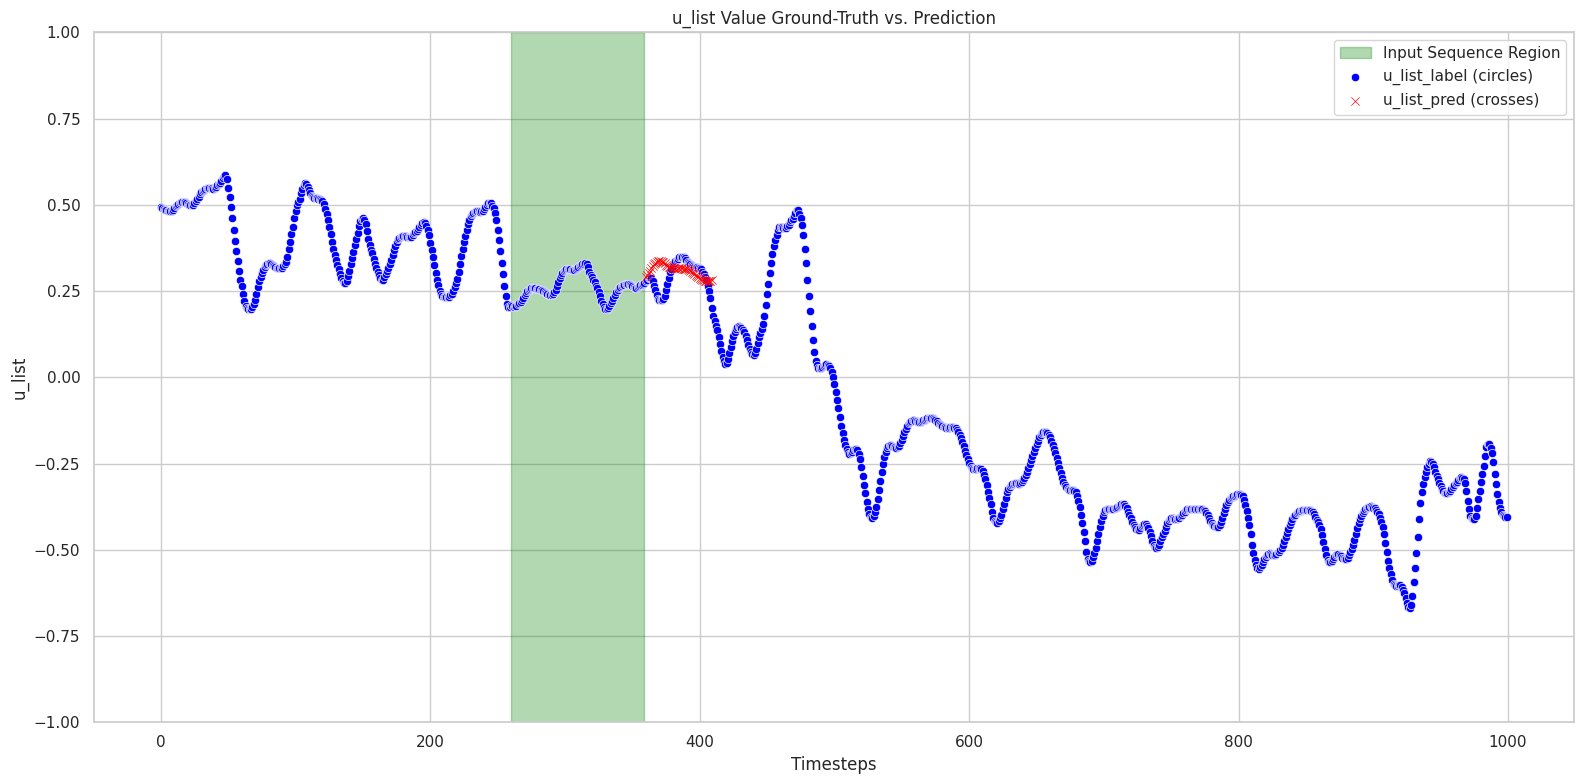

457it [00:04, 4565.13it/s, single_test_loss=0.593041]

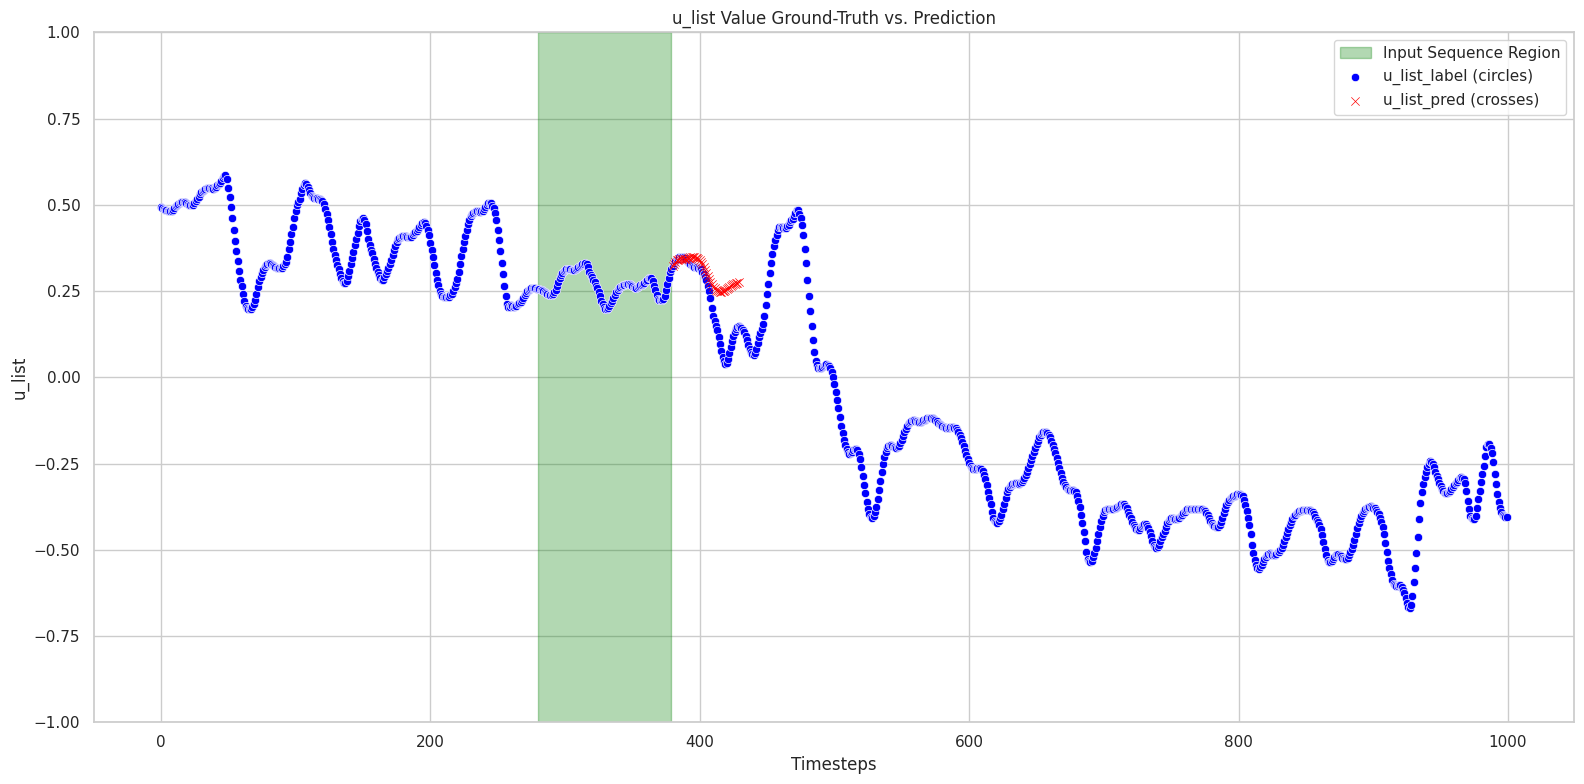

457it [00:04, 4565.13it/s, single_test_loss=0.755374]

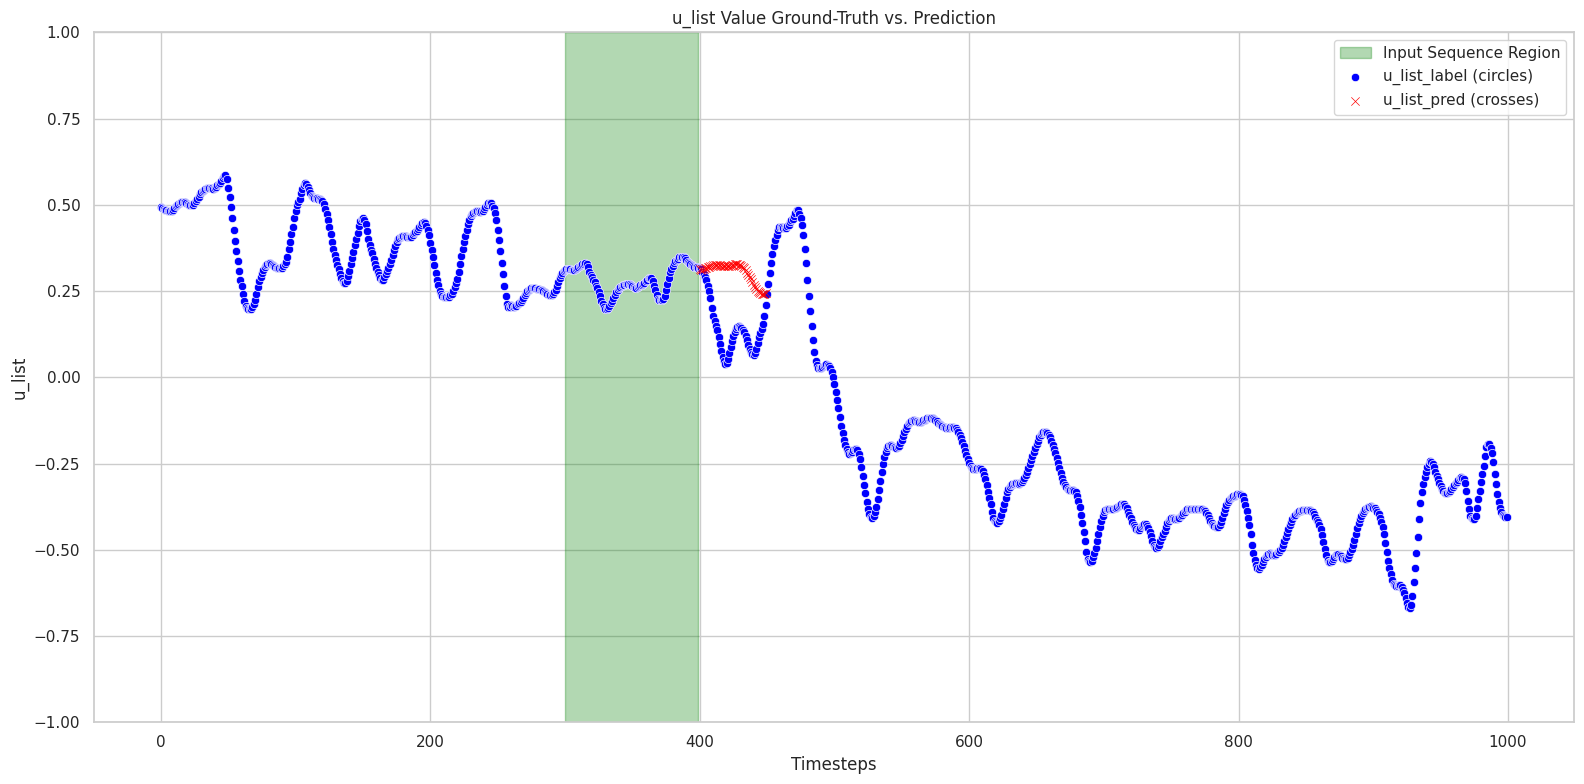

457it [00:05, 4565.13it/s, single_test_loss=0.402946]

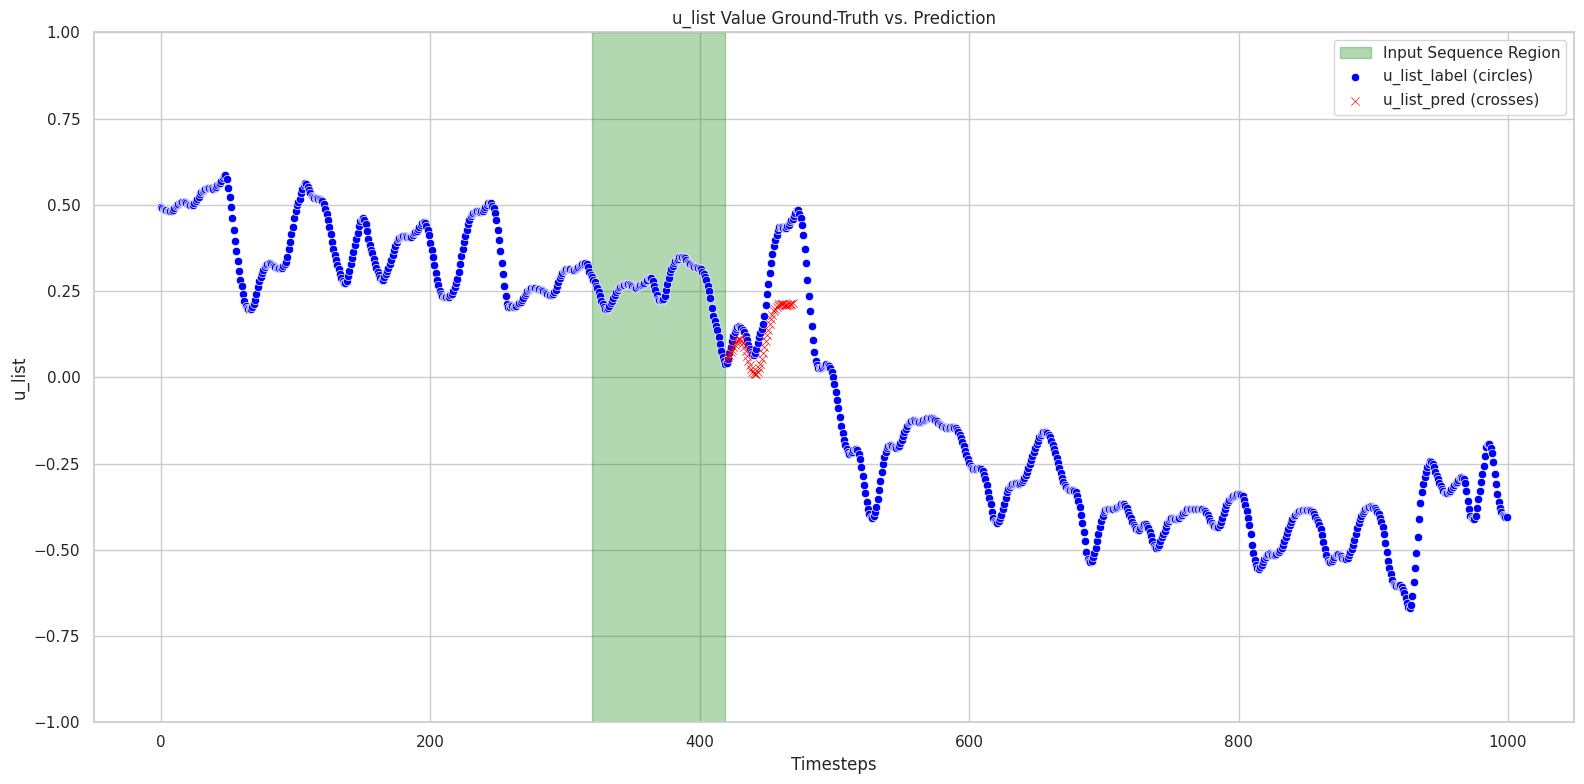

457it [00:05, 4565.13it/s, single_test_loss=0.453765]

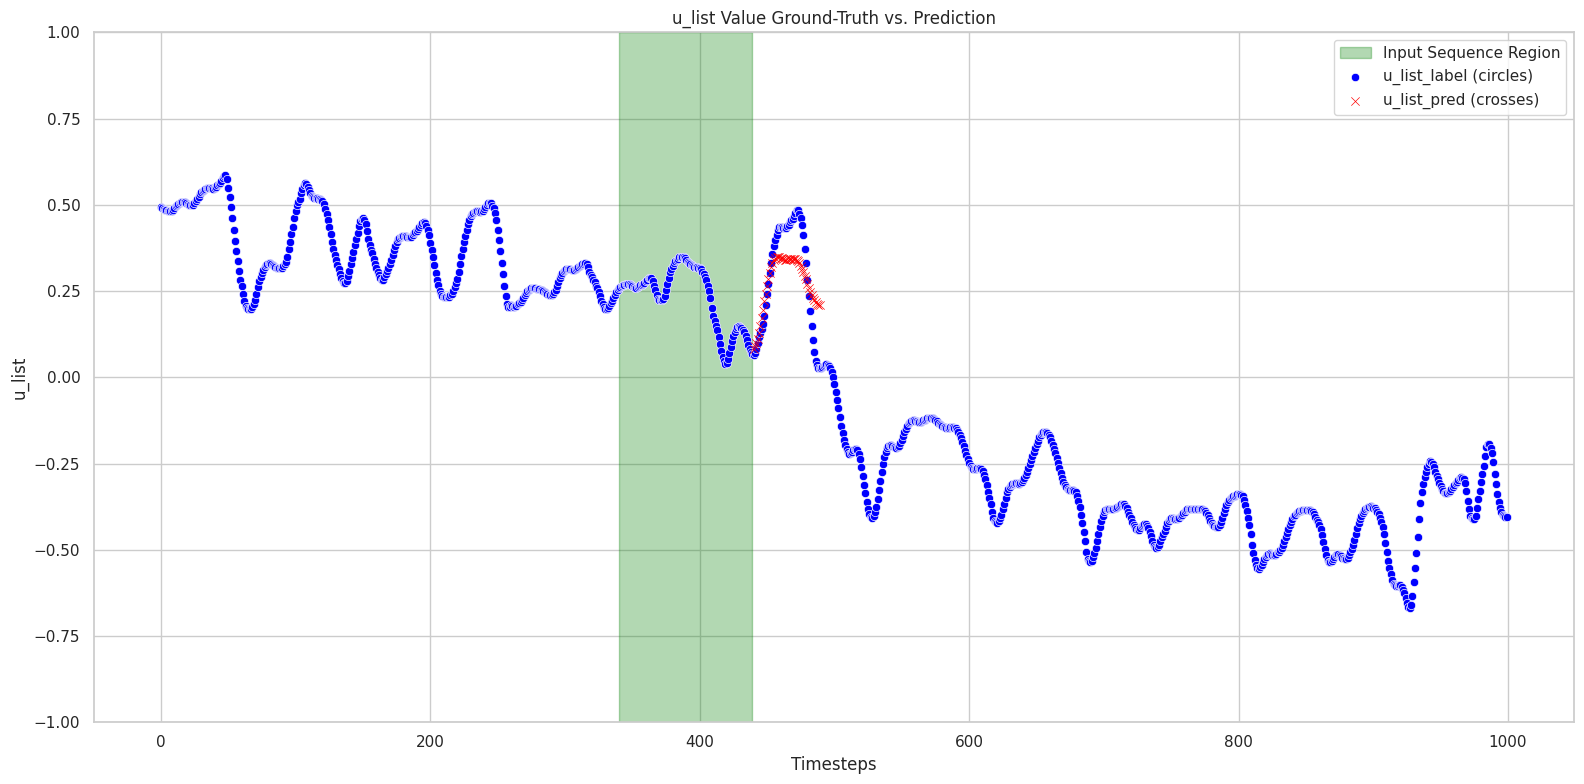

457it [00:05, 4565.13it/s, single_test_loss=0.580277]

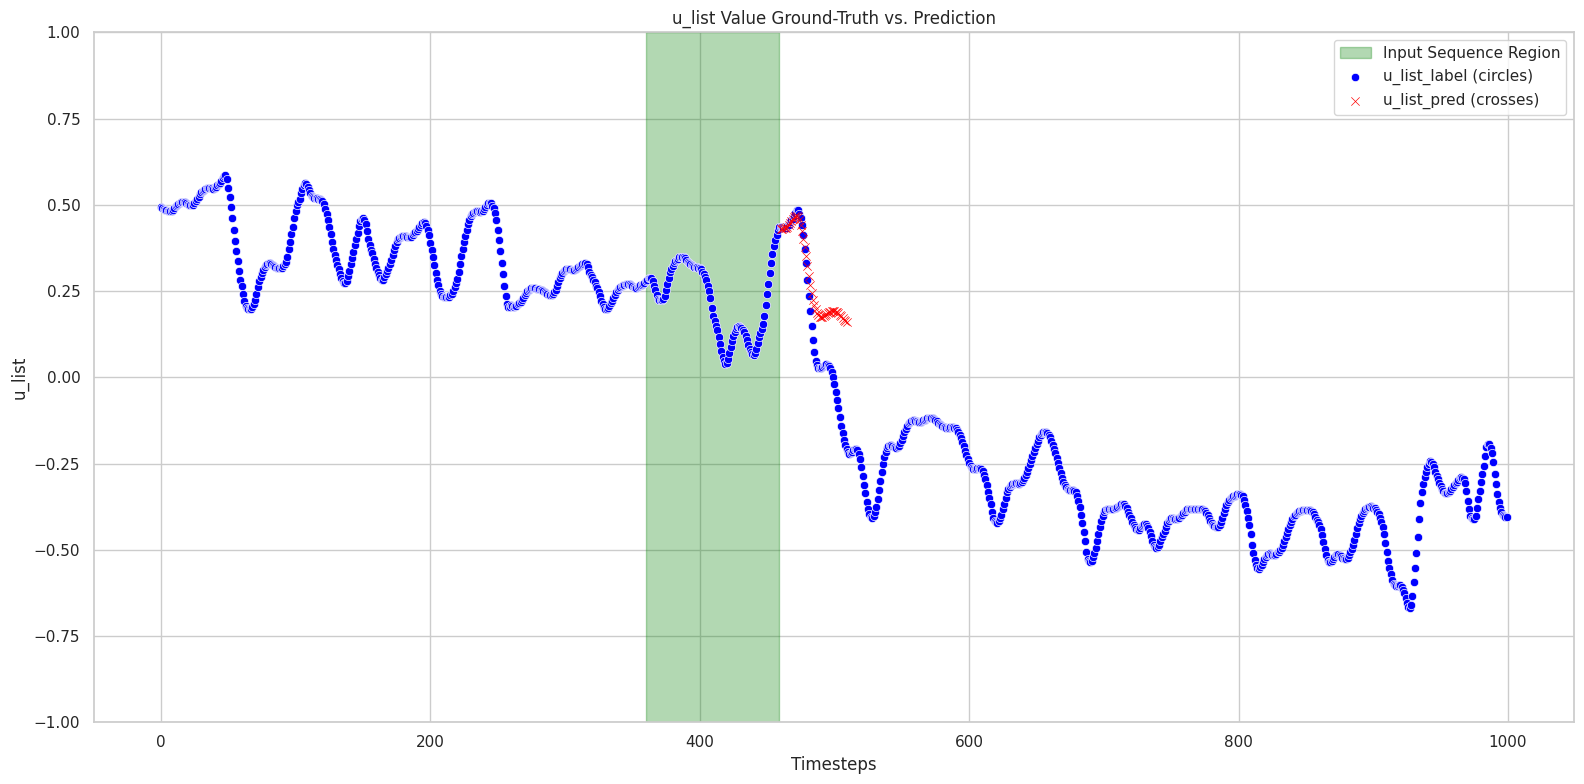

457it [00:06, 4565.13it/s, single_test_loss=2.008108]

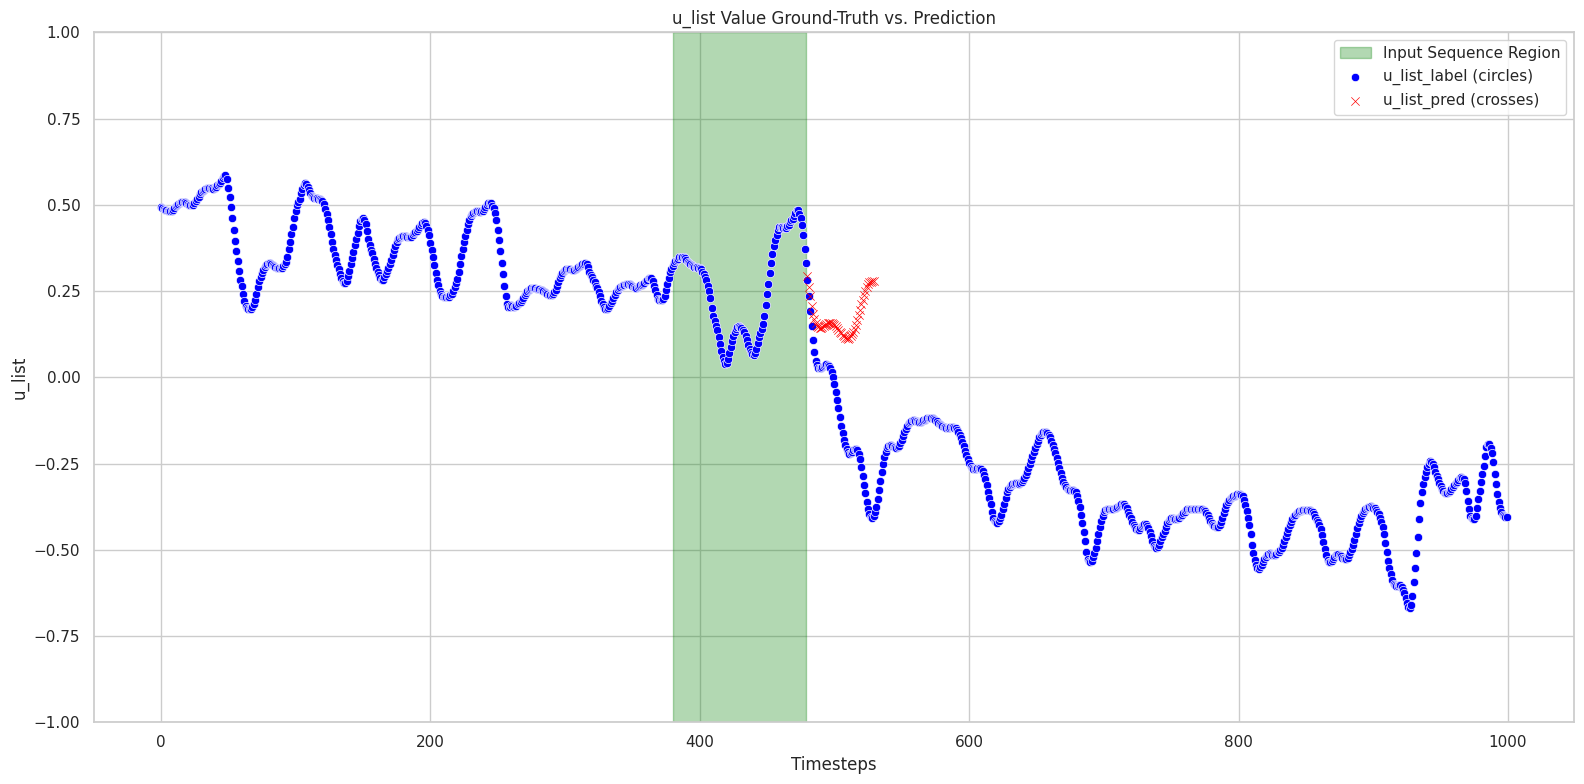

457it [00:06, 4565.13it/s, single_test_loss=0.901127]

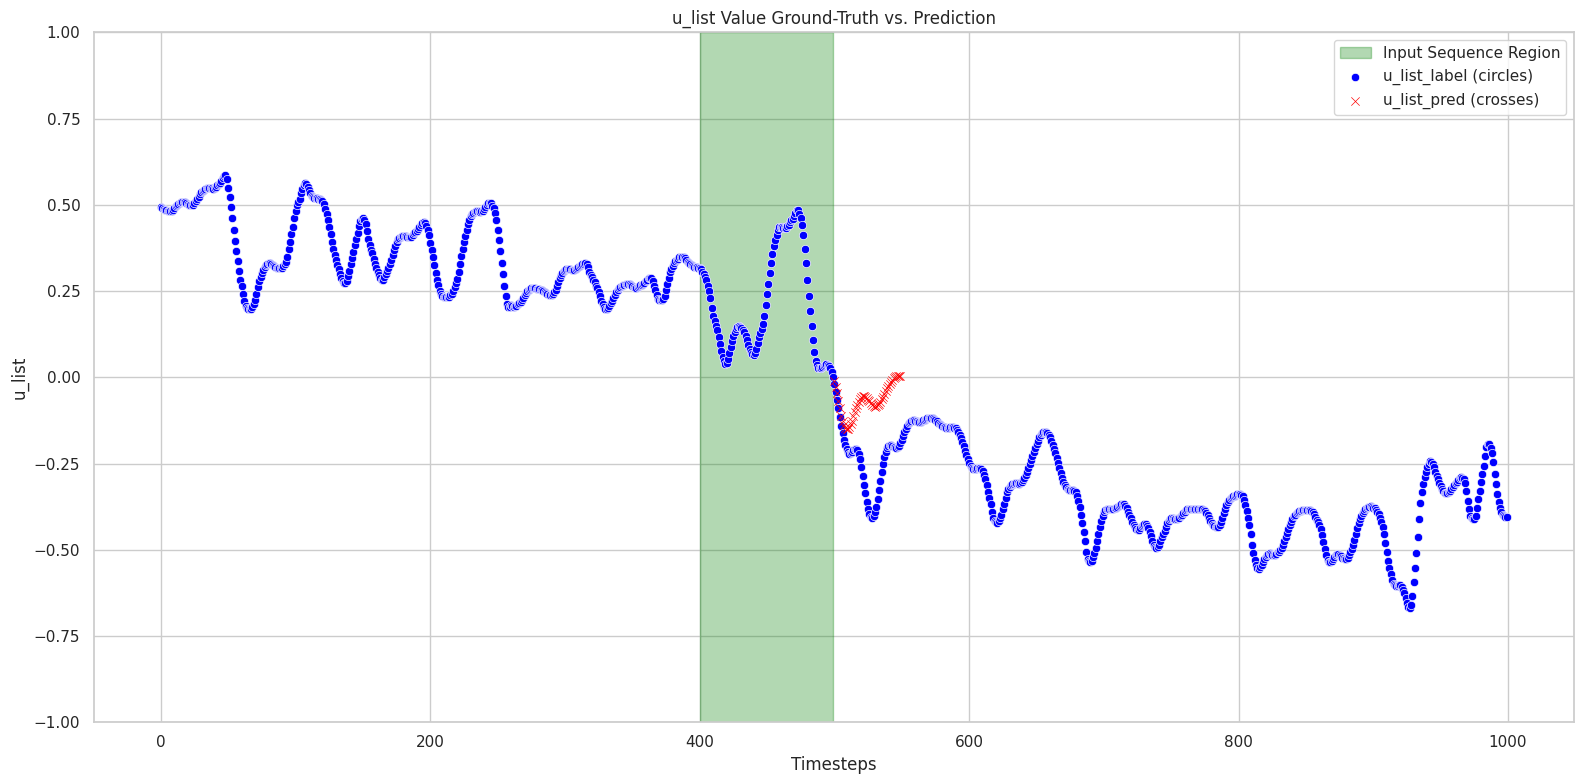

457it [00:06, 4565.13it/s, single_test_loss=0.292013]

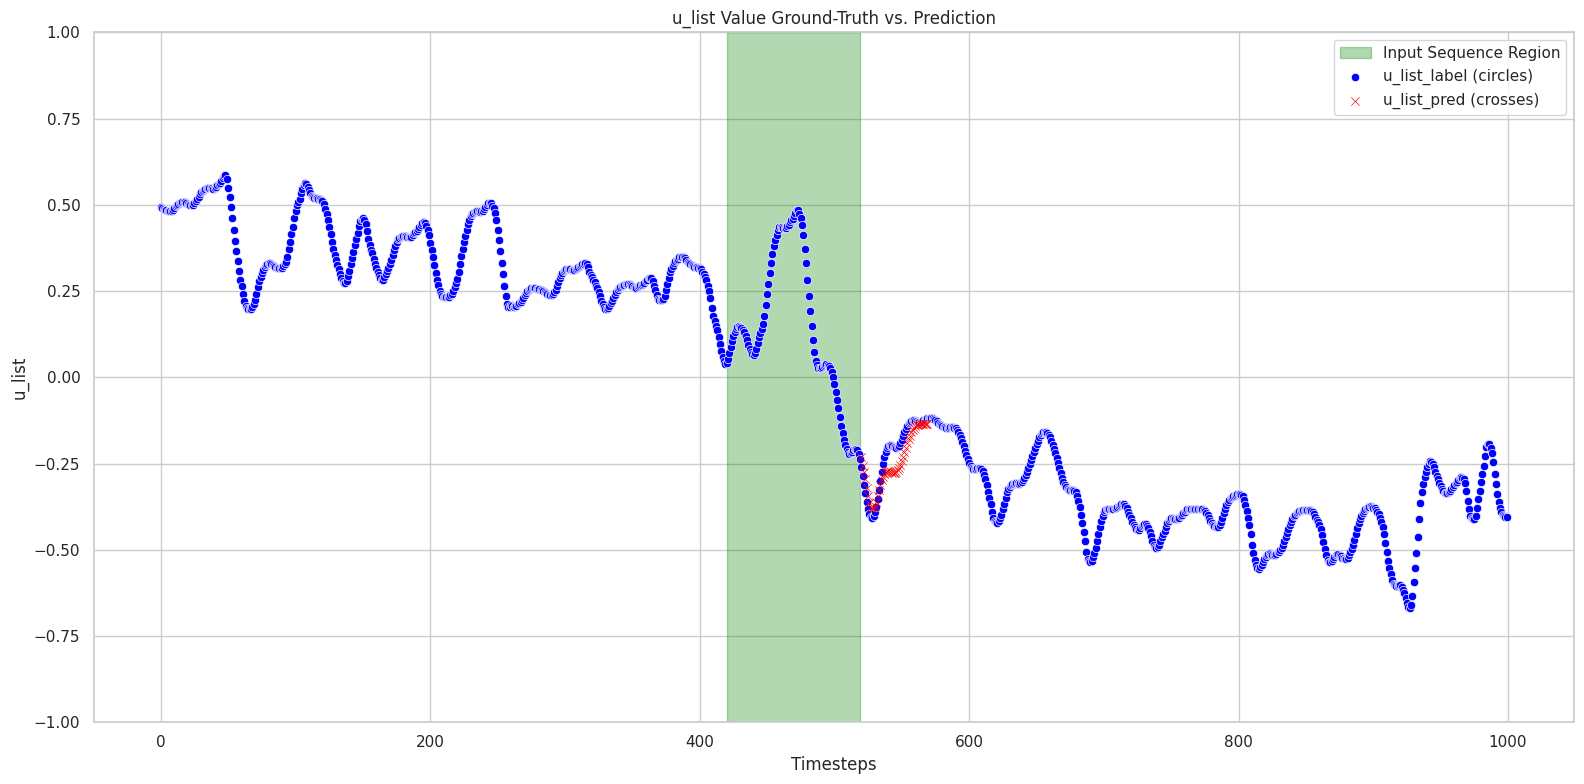

457it [00:06, 4565.13it/s, single_test_loss=0.189753]

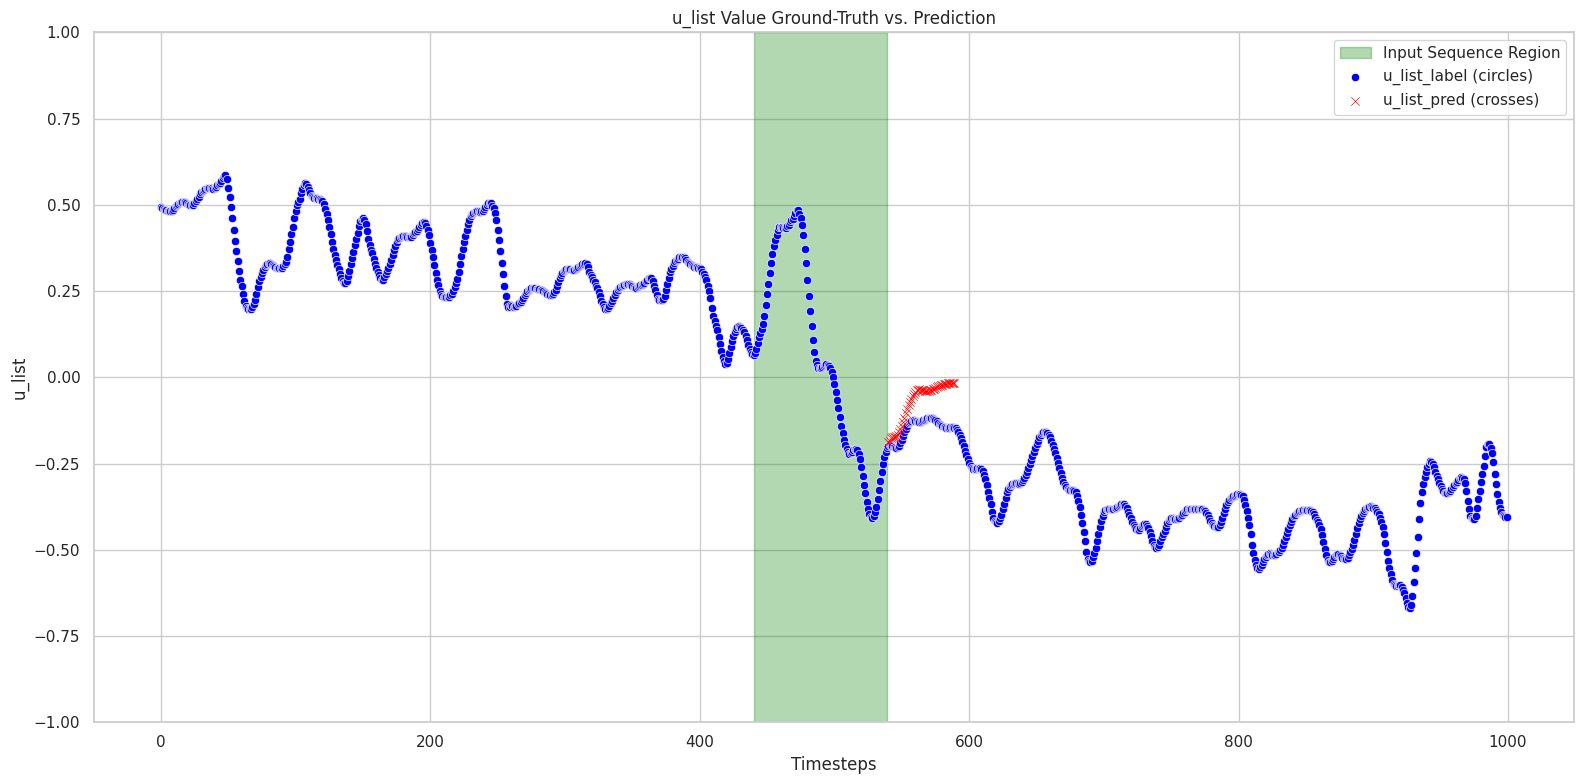

457it [00:07, 4565.13it/s, single_test_loss=0.164617]

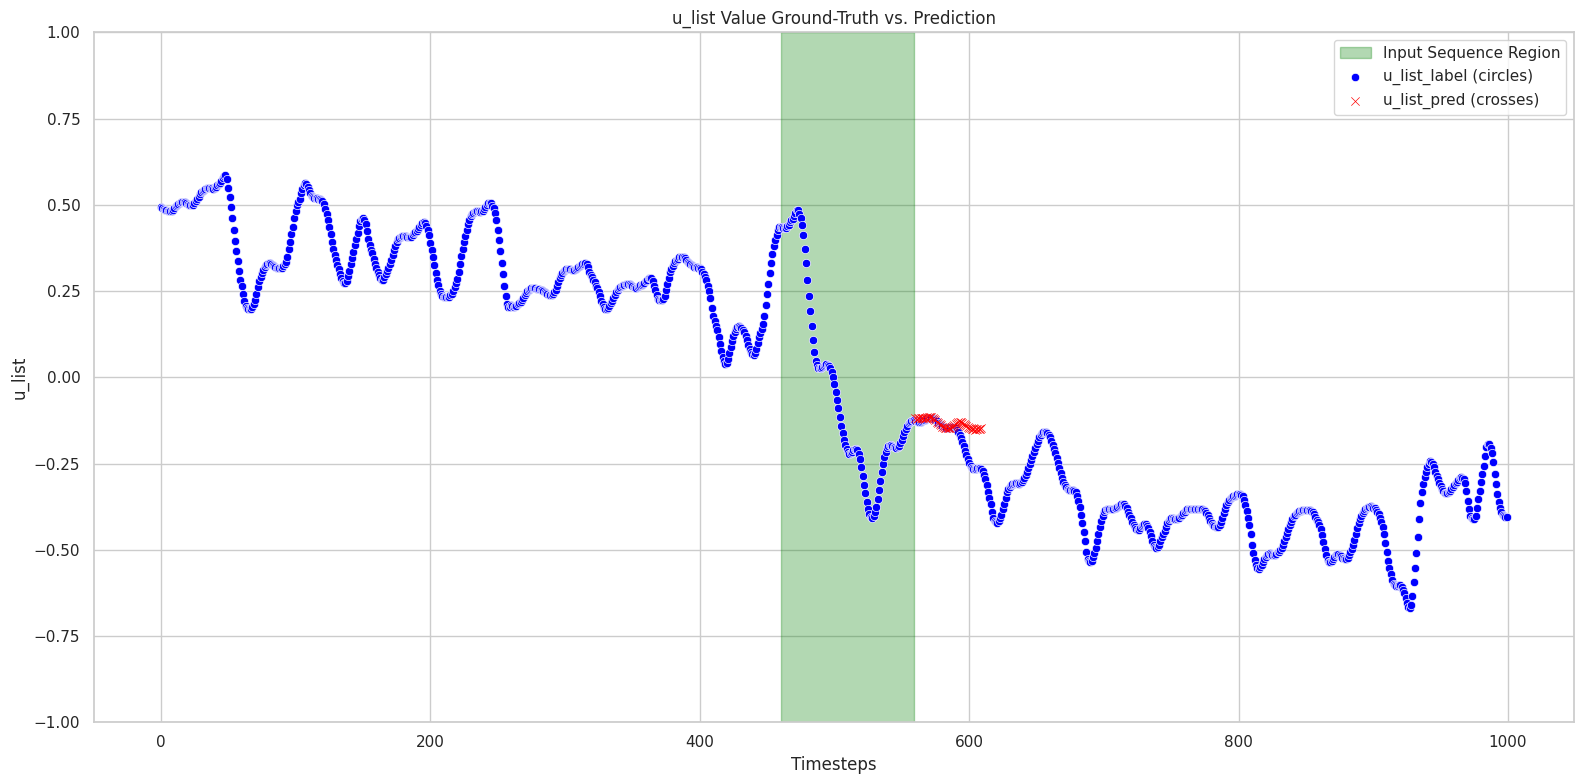

457it [00:07, 4565.13it/s, single_test_loss=0.325163]

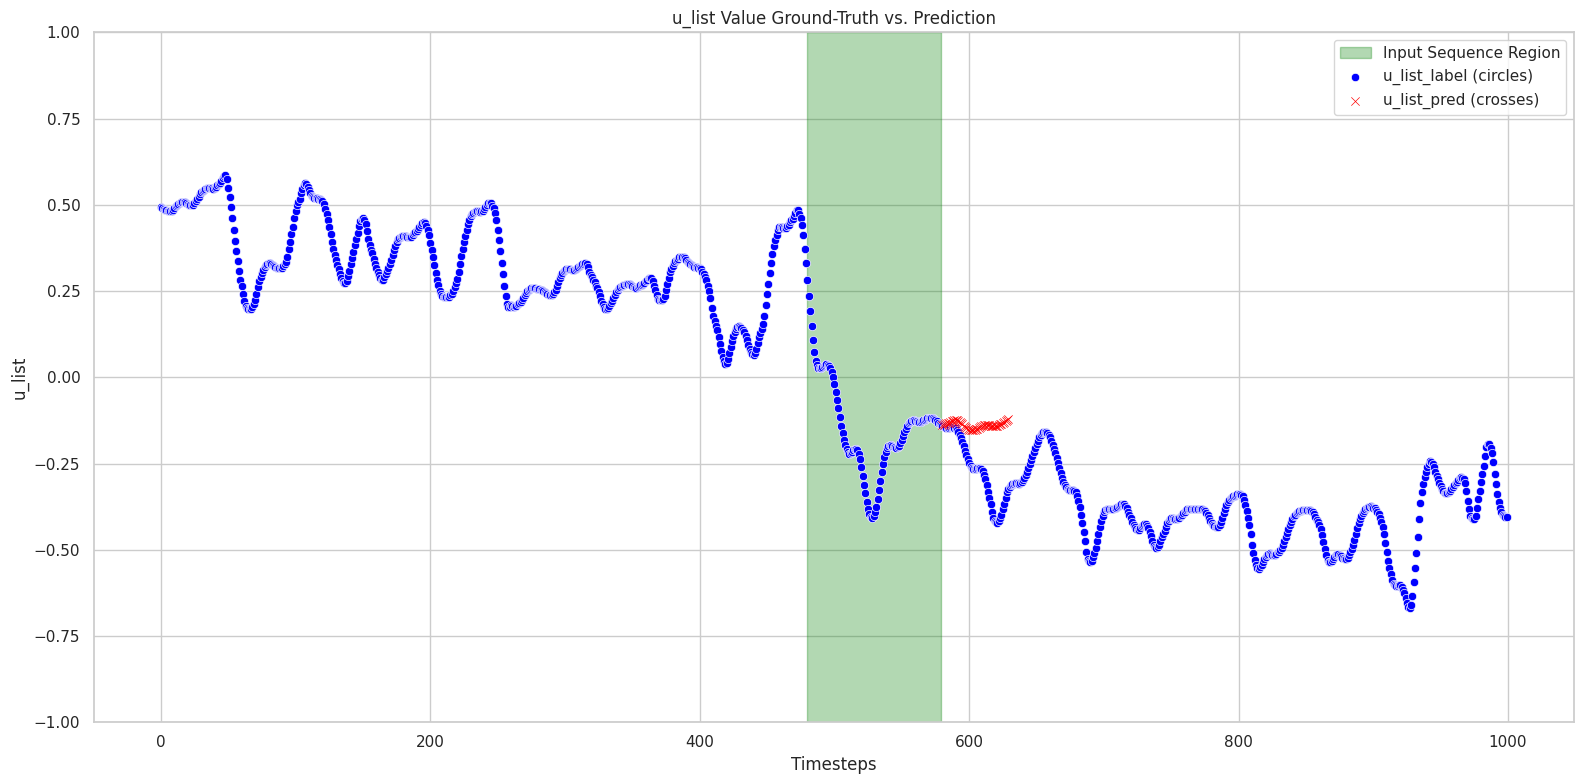

457it [00:07, 4565.13it/s, single_test_loss=0.057944]

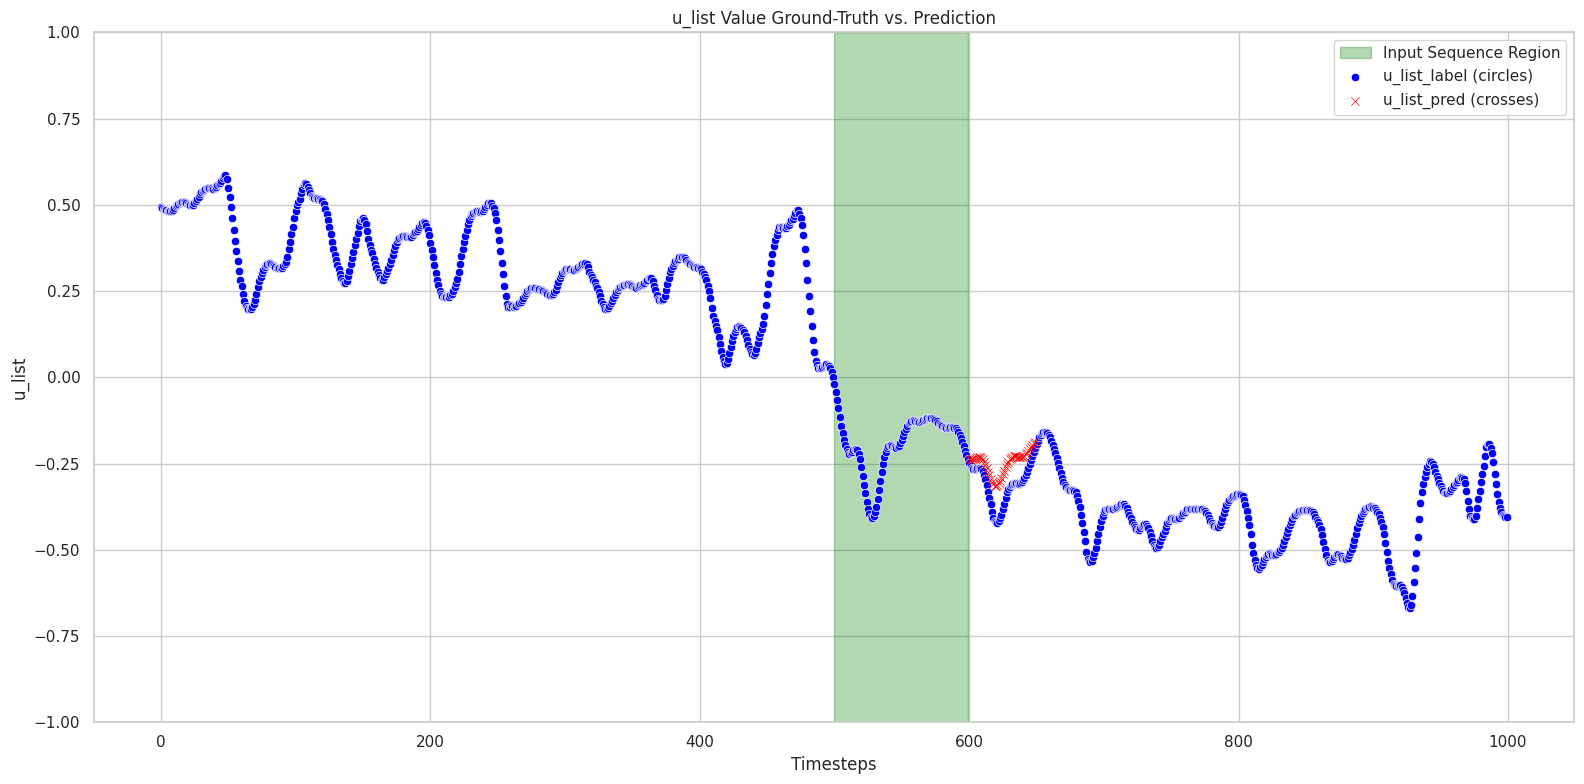

457it [00:08, 4565.13it/s, single_test_loss=0.069214]

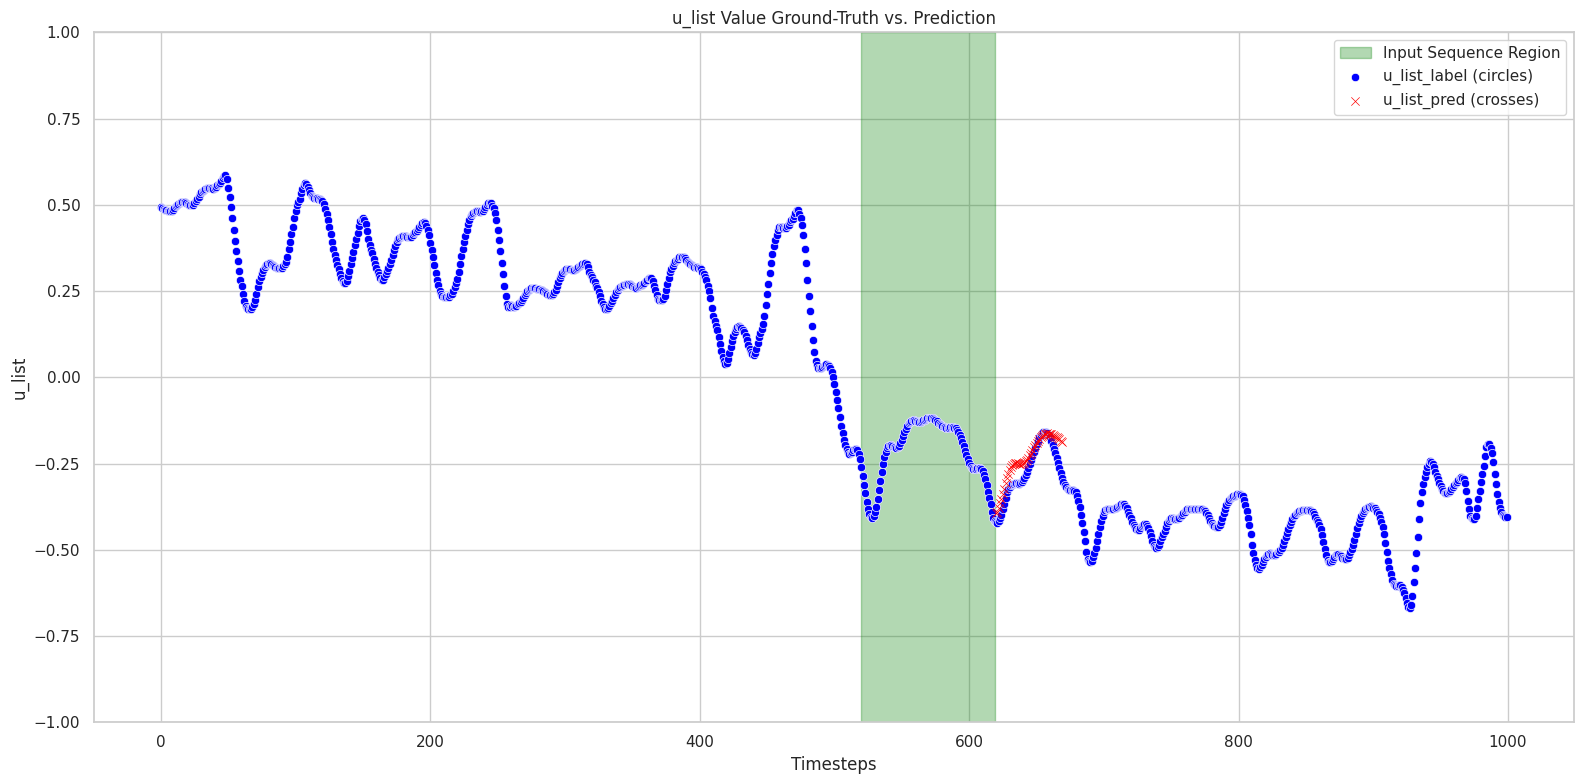

457it [00:08, 4565.13it/s, single_test_loss=0.280185]

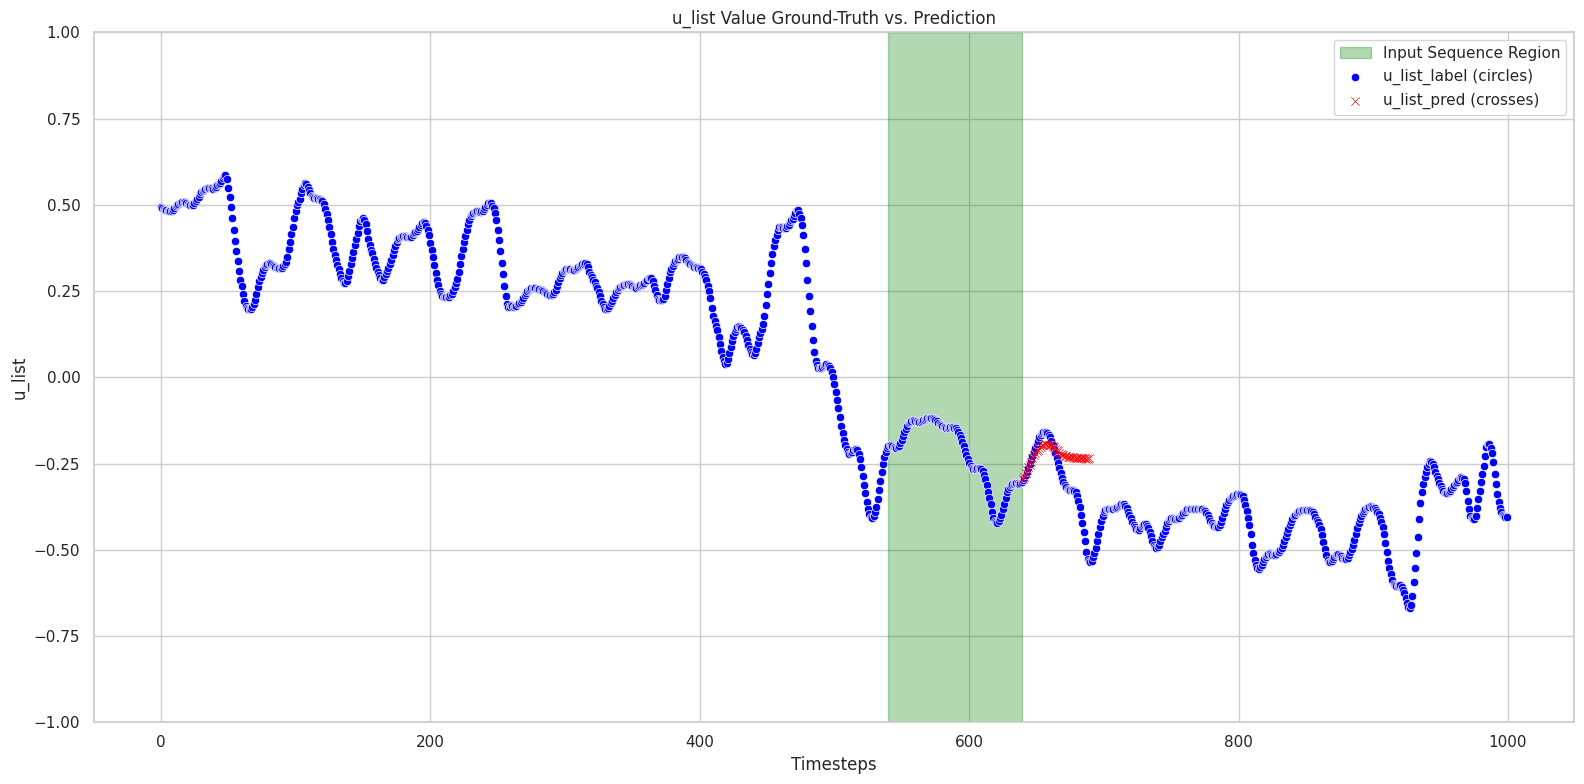

457it [00:08, 4565.13it/s, single_test_loss=0.363771]

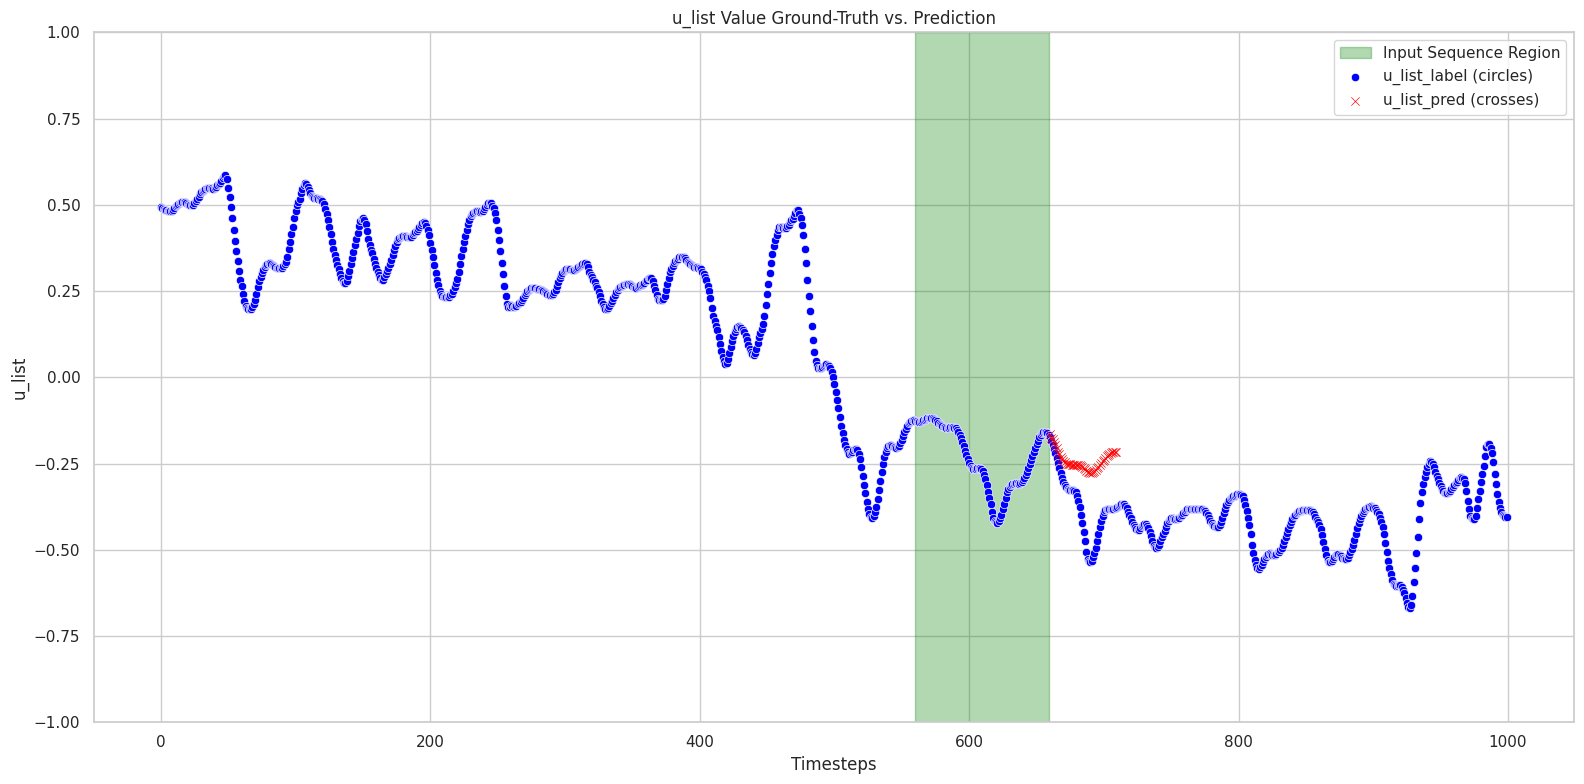

457it [00:09, 4565.13it/s, single_test_loss=0.298232]

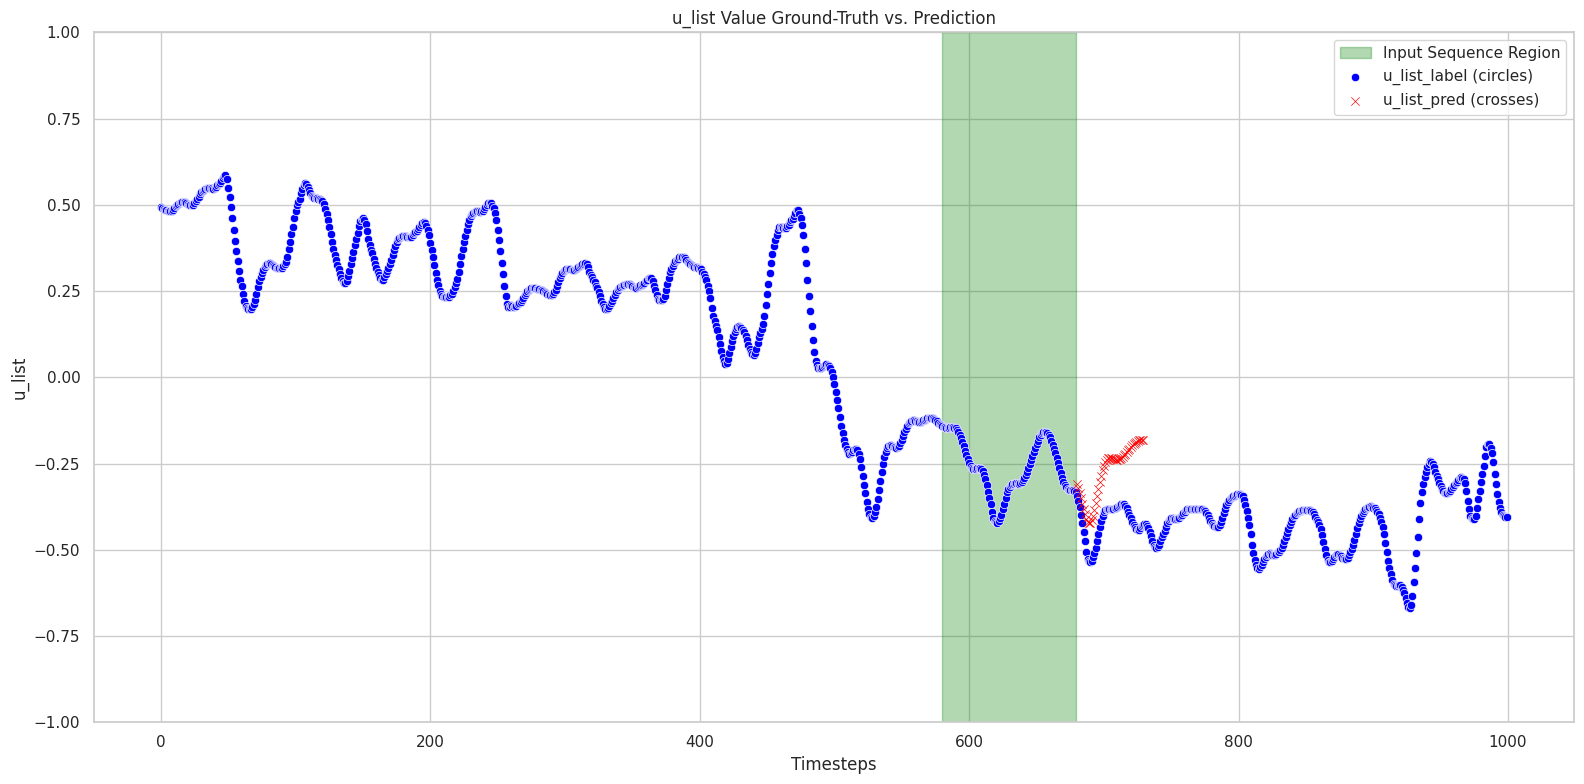

457it [00:09, 4565.13it/s, single_test_loss=0.185380]

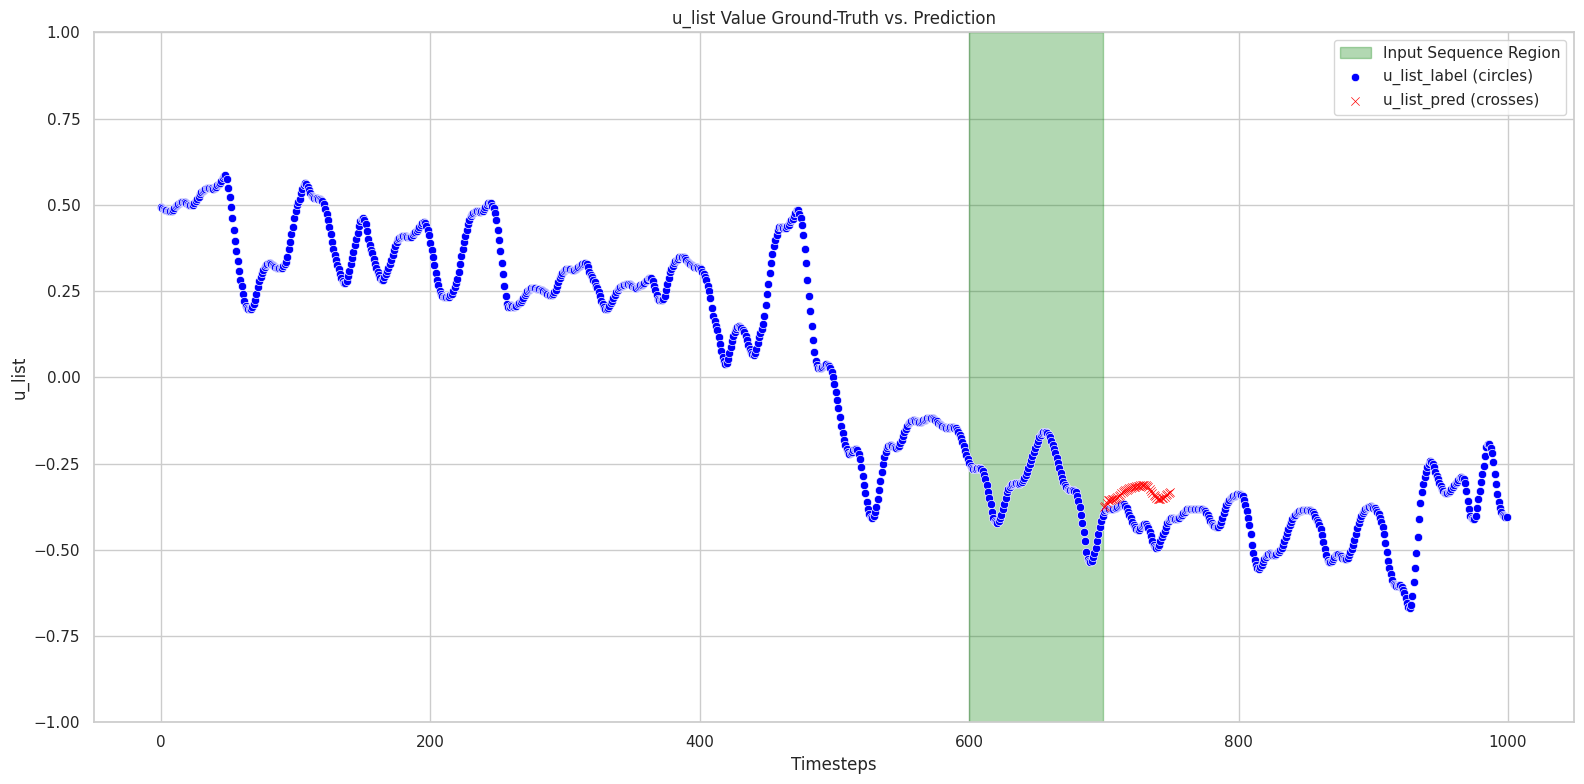

457it [00:09, 4565.13it/s, single_test_loss=0.226486]

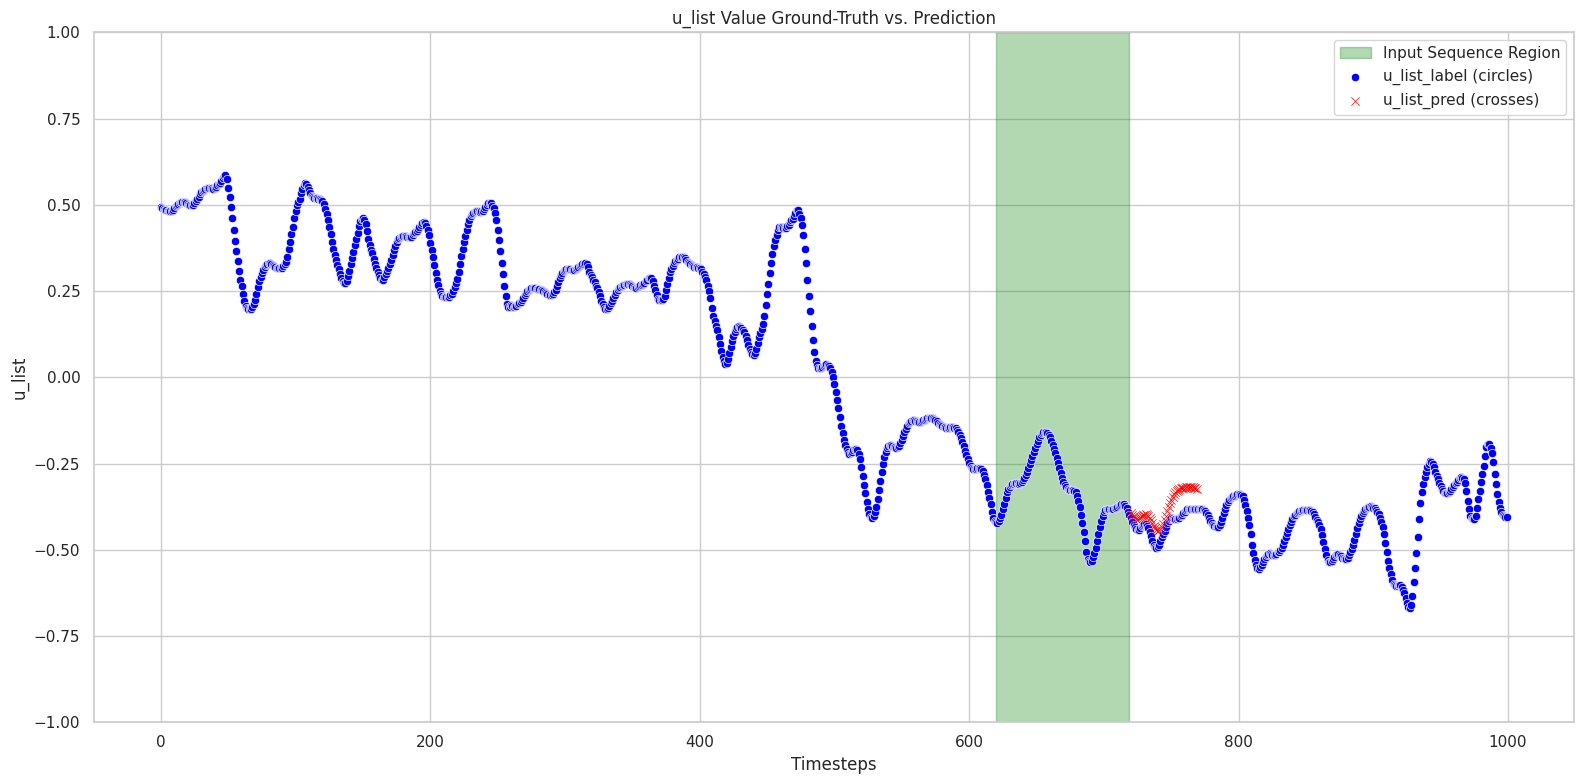

457it [00:10, 4565.13it/s, single_test_loss=0.205893]

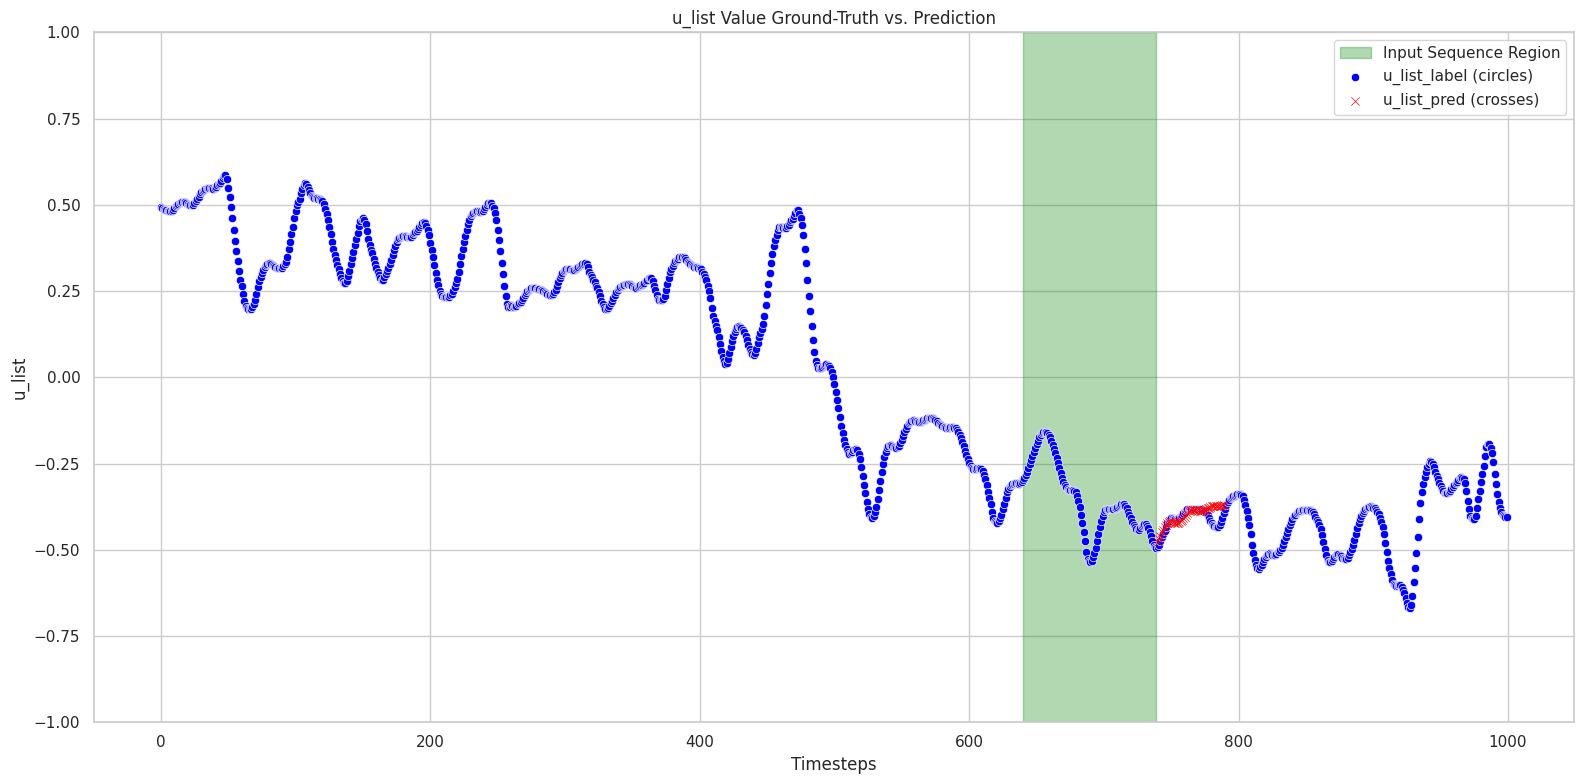

457it [00:10, 4565.13it/s, single_test_loss=0.388902]

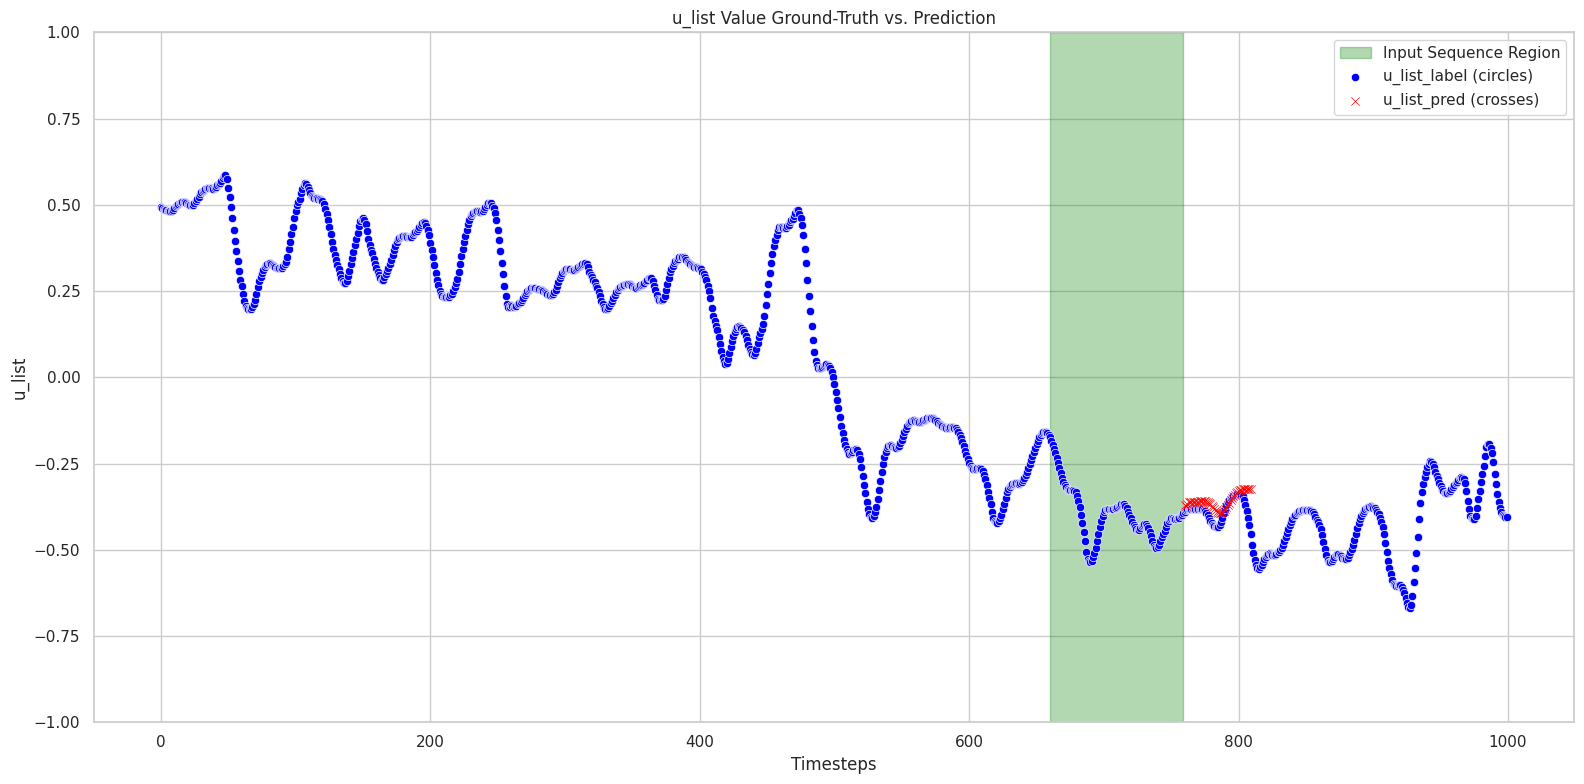

457it [00:10, 4565.13it/s, single_test_loss=0.459958]

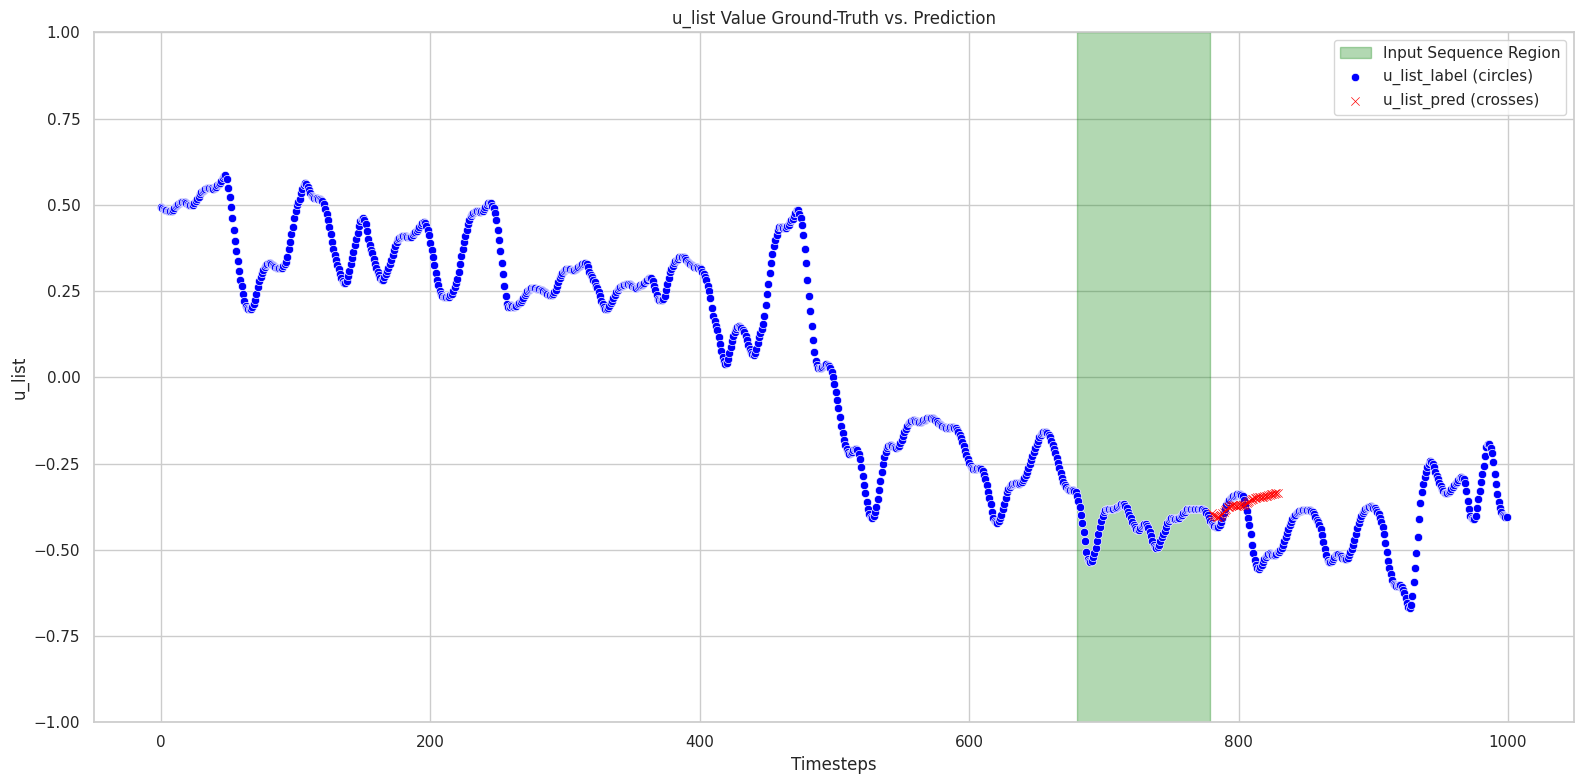

457it [00:11, 4565.13it/s, single_test_loss=0.216595]

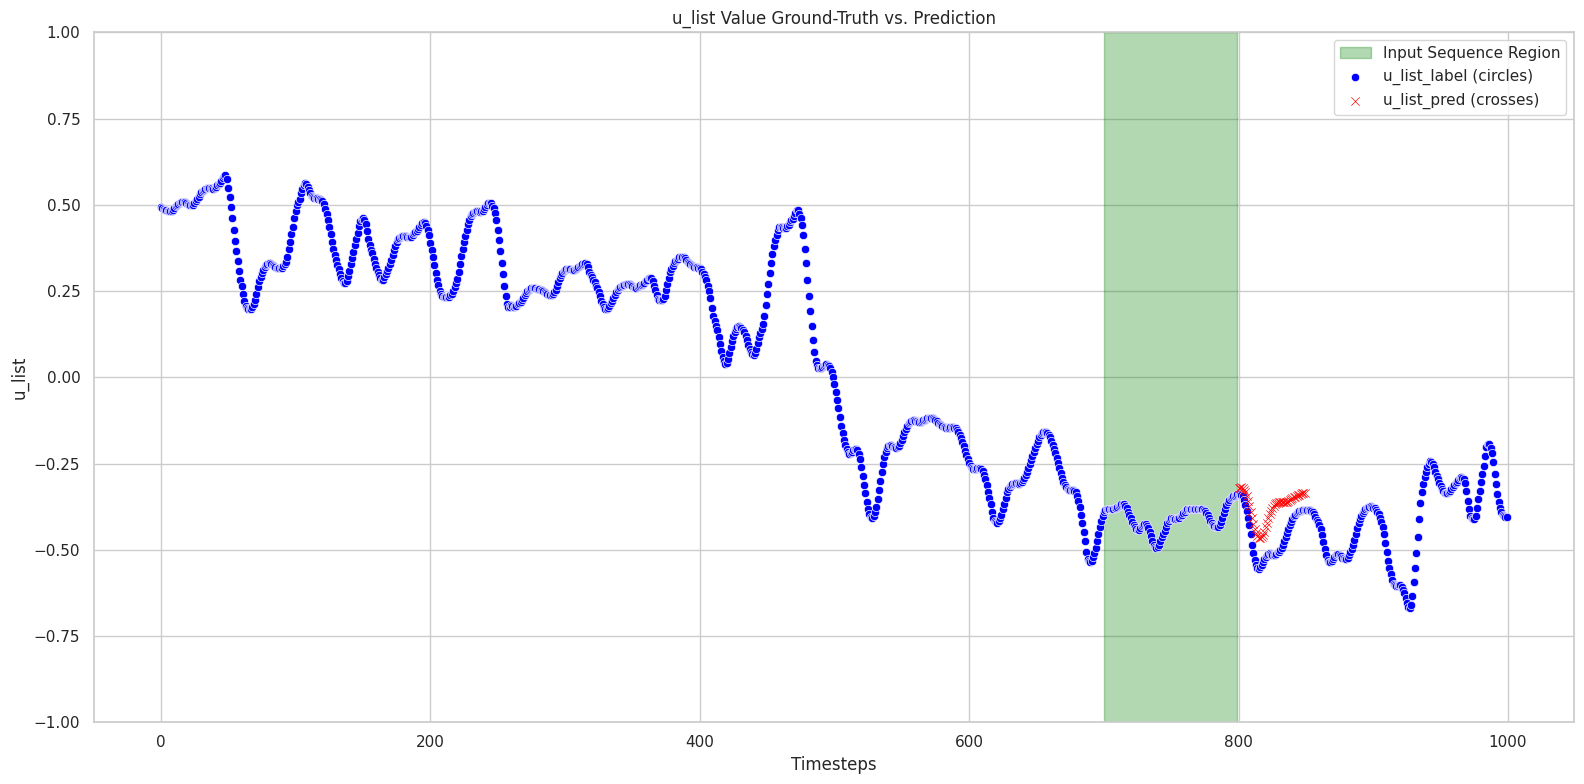

457it [00:11, 4565.13it/s, single_test_loss=0.090307]

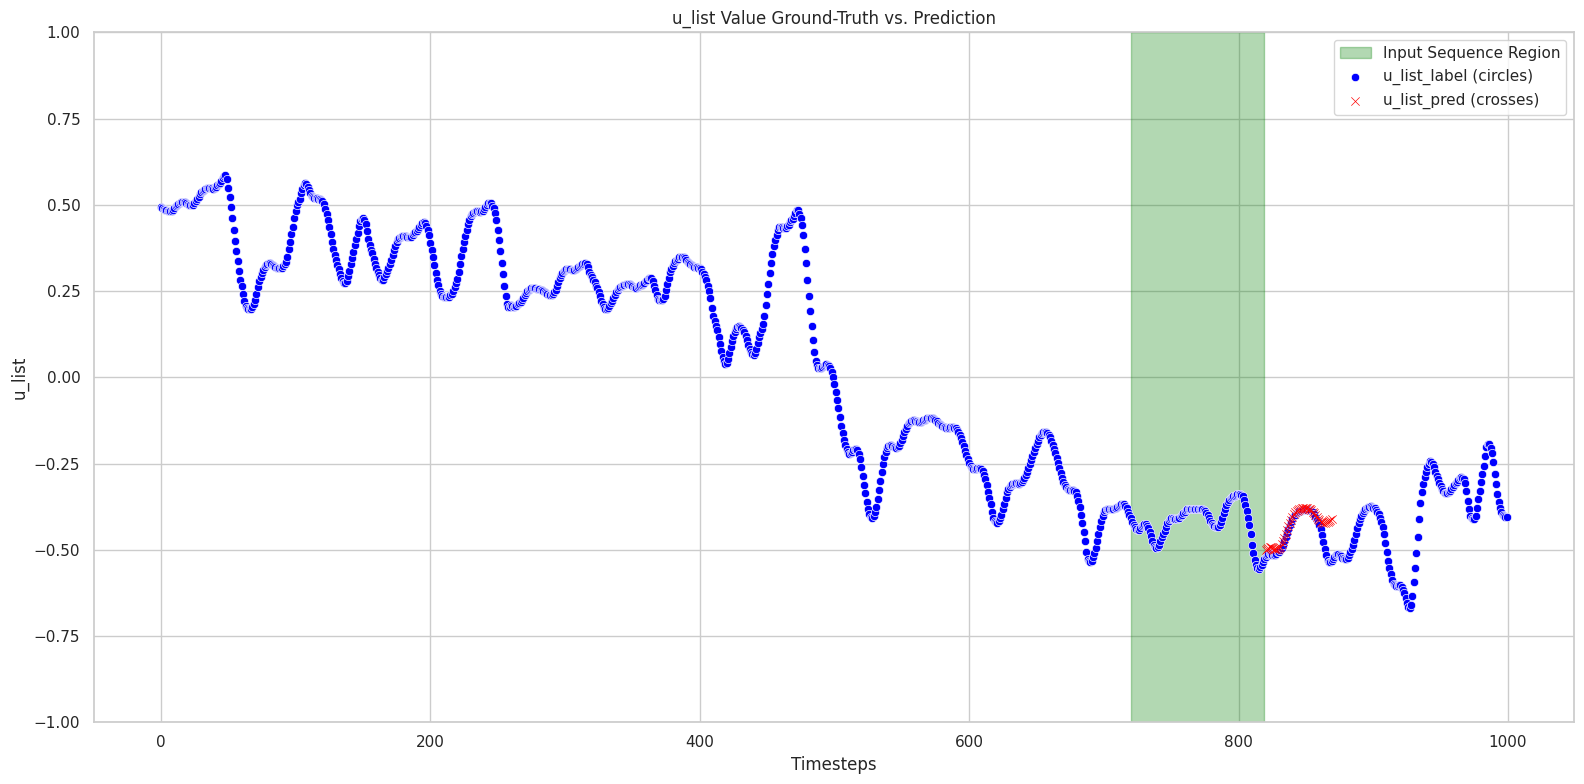

457it [00:11, 4565.13it/s, single_test_loss=0.235284]

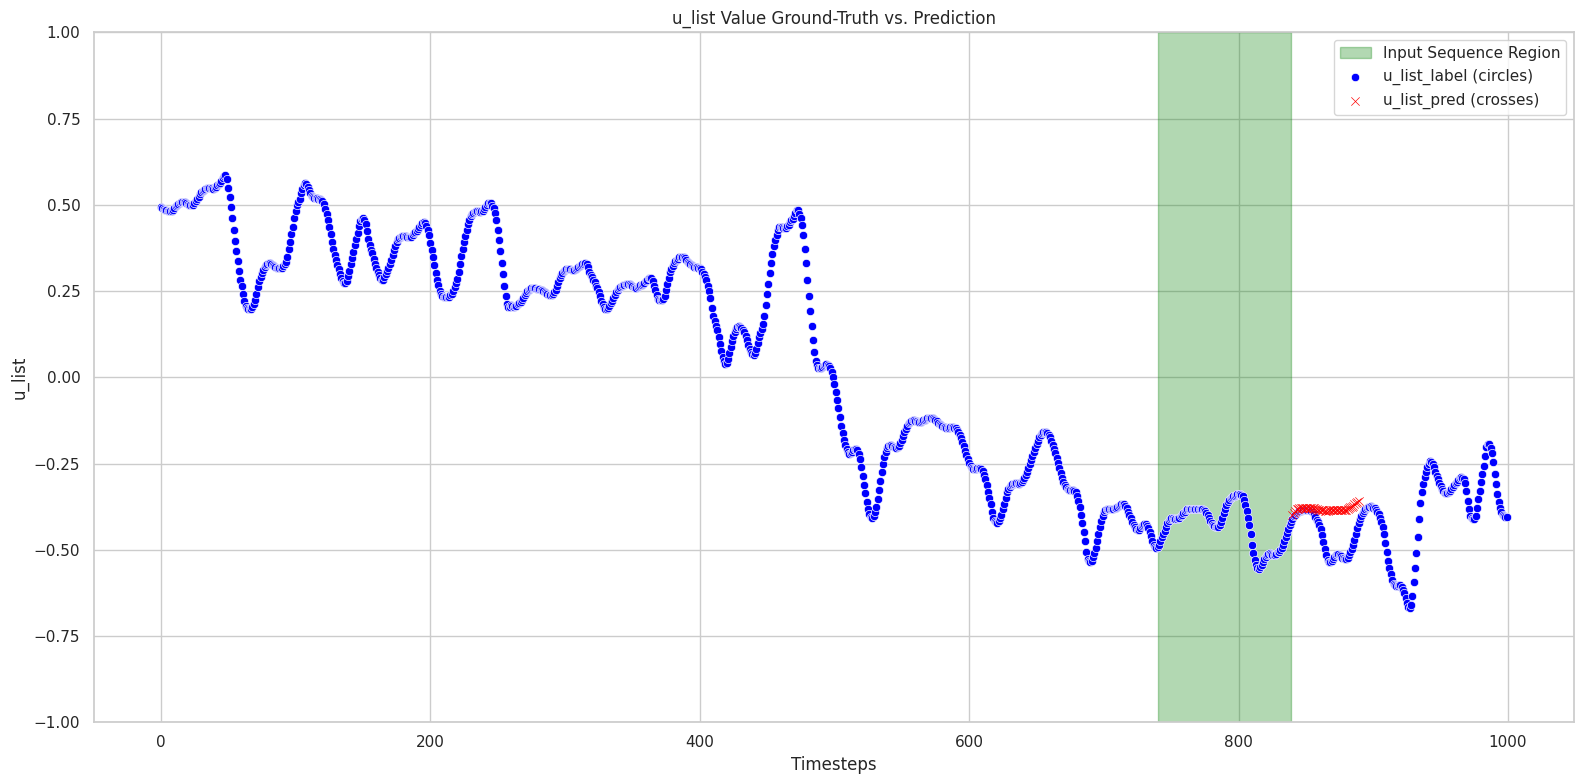

457it [00:11, 4565.13it/s, single_test_loss=0.280121]

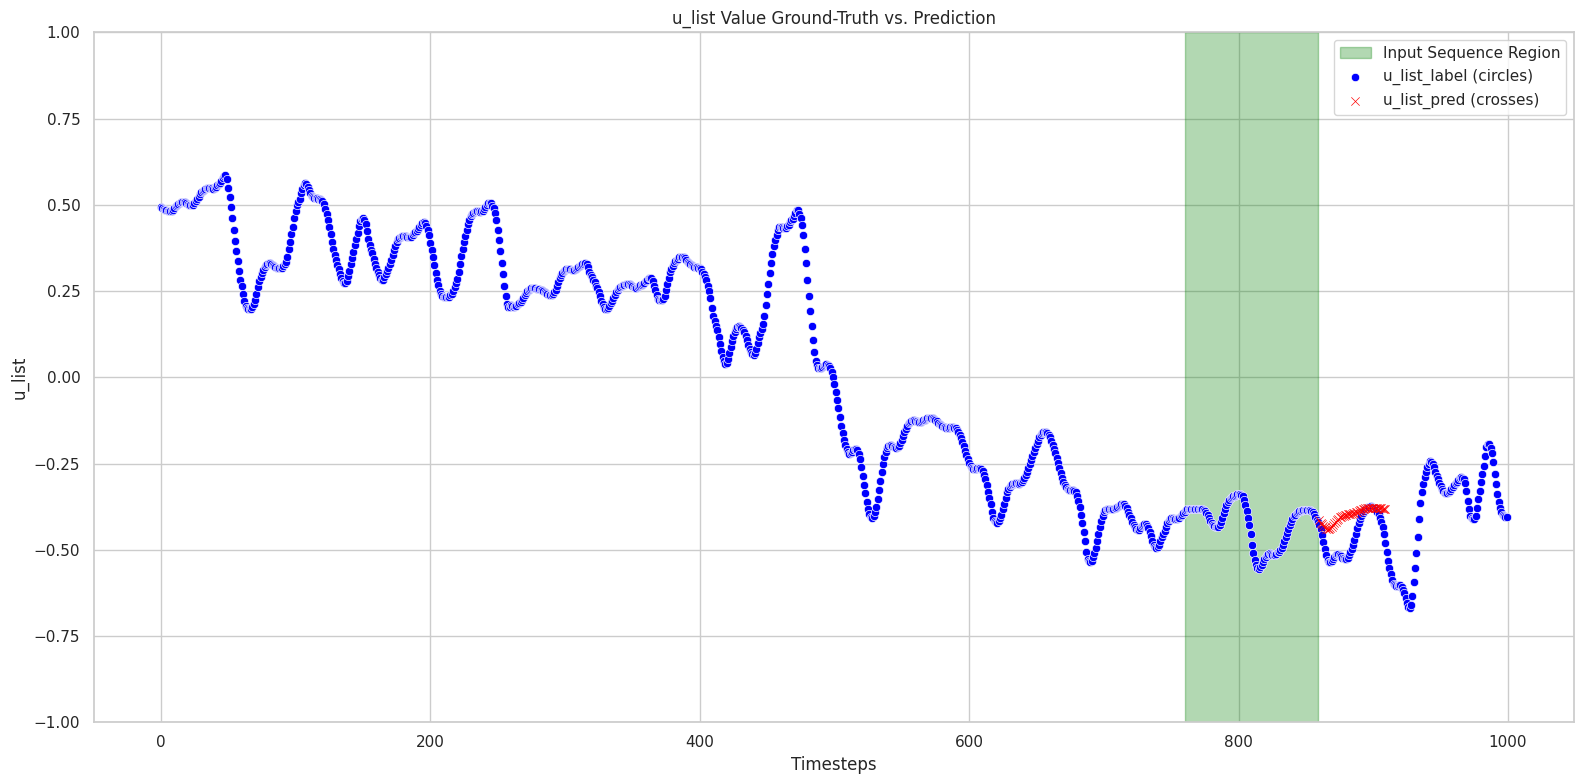

457it [00:12, 4565.13it/s, single_test_loss=0.409057]

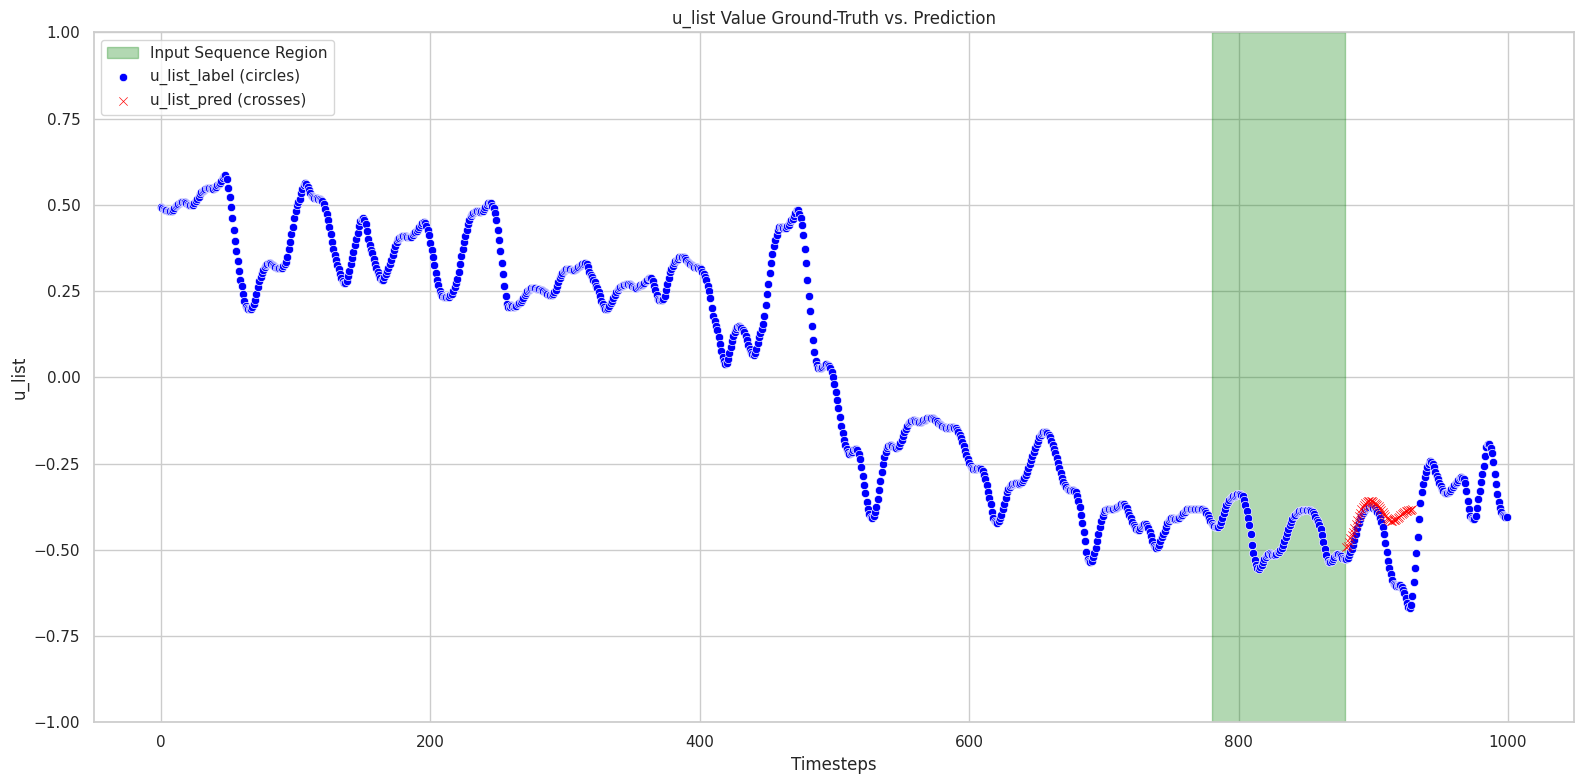

457it [00:12, 4565.13it/s, single_test_loss=0.674959]

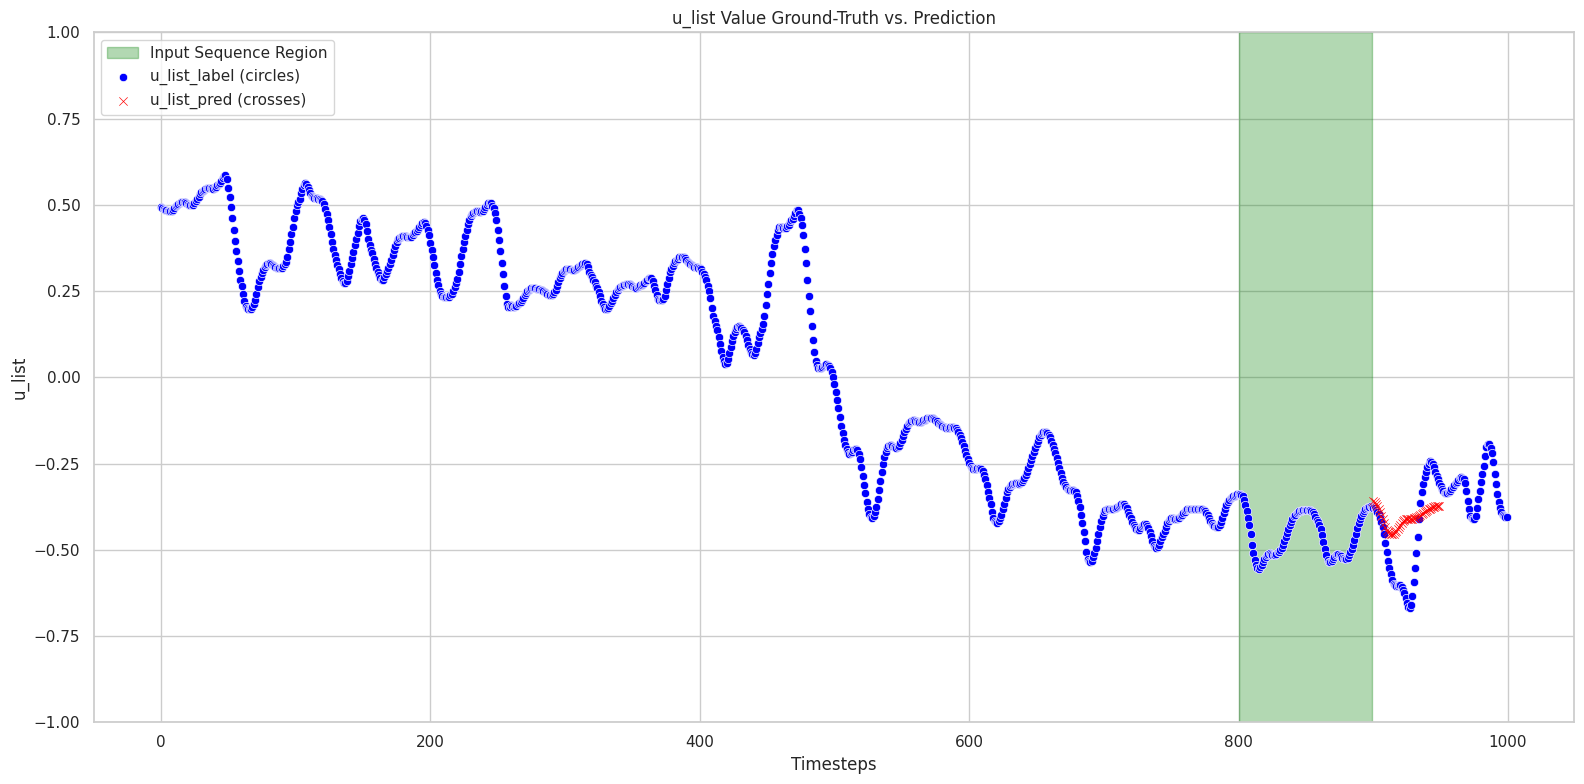

457it [00:12, 4565.13it/s, single_test_loss=0.190031]

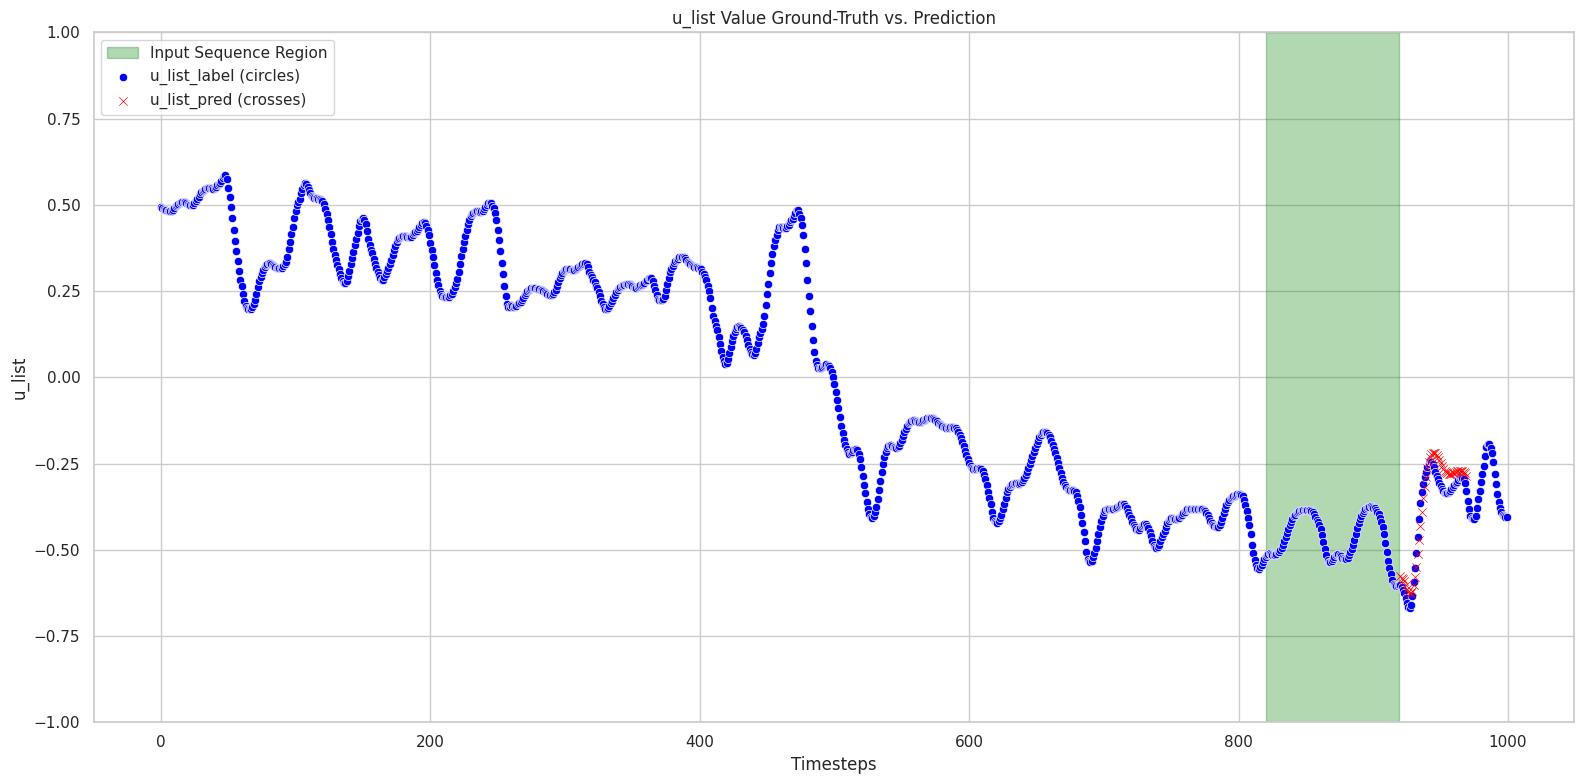

457it [00:13, 4565.13it/s, single_test_loss=0.391286]

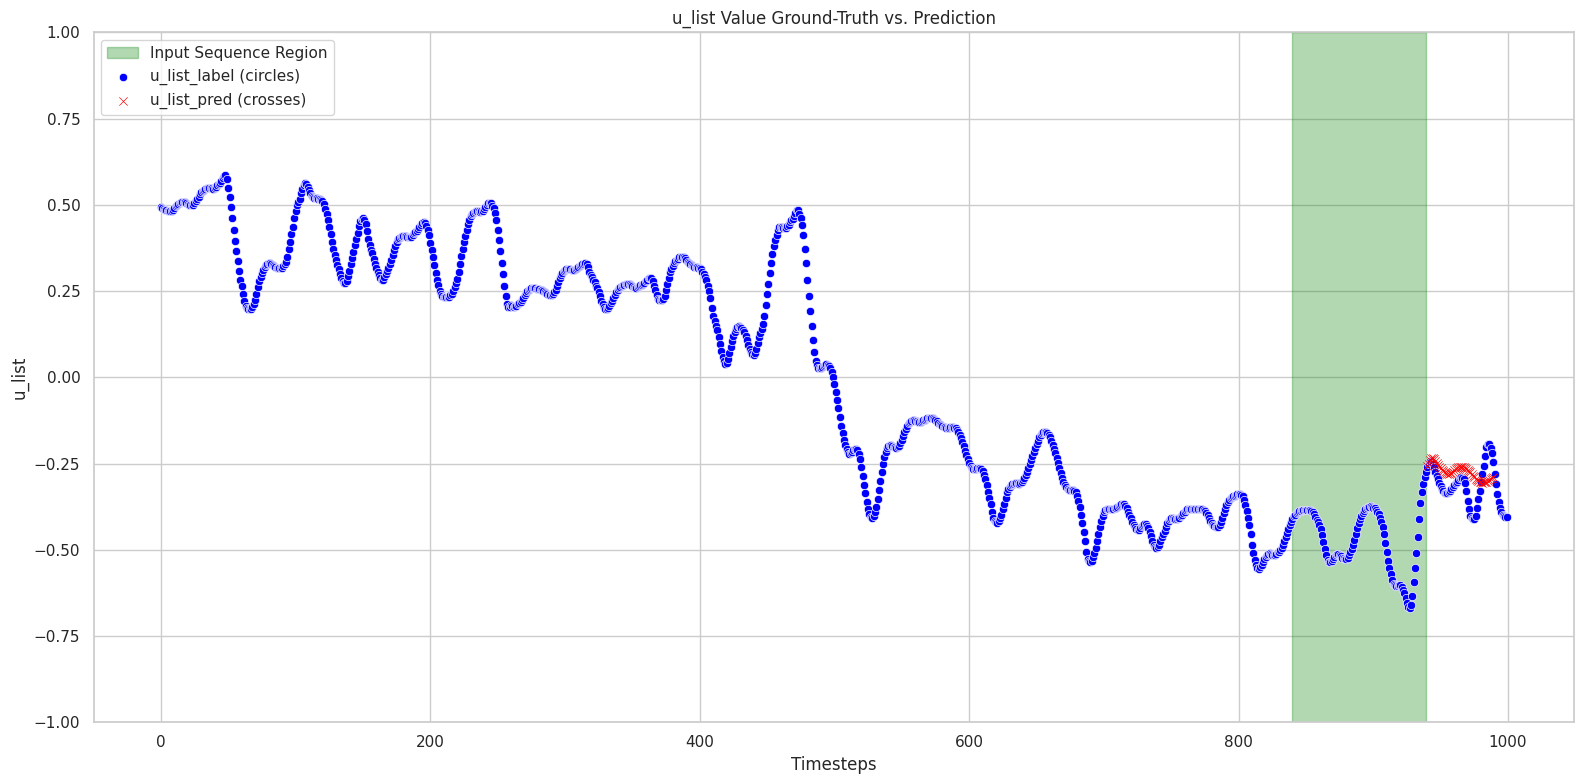

5461it [00:14, 382.86it/s, single_test_loss=0.391286] 


In [12]:
# IPYWIDGETS!!!

test_loss = 0.0
test_progress_bar = tqdm(
    data_loader_test
)

criterion = torch.nn.MSELoss()

target_timeseries_idx = 12
feature = "u_list"
figure_range = 1

num_datapoints_per_timeseries = 1 + (num_single_sample_timesteps - (input_window_length + label_window_length) + 1) // window_stride

with torch.no_grad():
    for datapoint_idx, (batch_x, batch_y, x_labels) in enumerate(test_progress_bar):
        if(datapoint_idx >= target_timeseries_idx * num_datapoints_per_timeseries and datapoint_idx < (target_timeseries_idx + 1) * num_datapoints_per_timeseries):
            window_idx = datapoint_idx % num_datapoints_per_timeseries

            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)

            preds = autoregress(
                model = model,
                batch_x = batch_x,
                batch_y = batch_y,
                device = device,
                extract_attention = True
            )
            
            loss = criterion(preds, batch_y)
            test_progress_bar.set_postfix({
                "single_test_loss": f"{loss.item():.6f}"
            })

            x = list(range(num_single_sample_timesteps))

            feature_idx = label_features.index(feature)

            feature_label = batch_y[0, :, feature_idx].cpu()
            feature_pred = preds[0, :, feature_idx].cpu()
            feature_x_labels = x_labels[0, :, feature_idx]

            # feature_pred = (feature_pred * stats["std"][feature]) + stats["mean"][feature]
            # feature_label = (feature_label * stats["std"][feature]) + stats["mean"][feature]
            # feature_x_labels = (feature_x_labels * stats["std"][feature]) + stats["mean"][feature]
        
            feature_pred = (feature_pred * stats[window_idx, f"{feature}_std"]) + stats[window_idx, f"{feature}_mean"]
            feature_label = (feature_label * stats[window_idx, f"{feature}_std"]) + stats[window_idx, f"{feature}_mean"]
            # No normalization on x_labels in WindowedIterableDataset!

            sns.set_theme(style = "whitegrid")
            fig, ax = plt.subplots(figsize = (16, 8))
            ax.set_ylim(-figure_range, figure_range)

            ax.axvspan(
                x[window_idx * window_stride],
                x[window_idx * window_stride + input_window_length - 1],
                color = "green",
                alpha = 0.3,
                label = "Input Sequence Region"
            )

            sns.scatterplot(
                x = x,
                y = feature_x_labels,
                marker = "o",
                label = f"{feature}_label (circles)",
                color = "blue",
                ax = ax
            )

            sns.scatterplot(
                x = x[(input_window_length + window_idx * window_stride):(input_window_length + window_idx * window_stride + label_window_length)],
                y = feature_pred,
                marker = "x",
                label = f"{feature}_pred (crosses)",
                color = "red",
                ax = ax
            )

            ax.set_title(f"{feature} Value Ground-Truth vs. Prediction")
            ax.set_xlabel("Timesteps")
            ax.set_ylabel(feature)
            ax.legend()

            plt.tight_layout()
            plt.show()
            
            avg_attn_vals = model.get_average_attention_values()

            # for i in range(20):                                      # First 20 predictions following input sequence 
            #     output_row = avg_attn_vals[i, :]
            #     top_k_indices = np.argsort(output_row)[::-1][:10]    # Top 10 highest attention input timesteps
            #     top_k_scores = output_row[top_k_indices]
            #     print(f"Output Timestep {input_window_length + window_idx * window_stride + i + 1}")
            #     print(f"    Input Timesteps {top_k_indices + (window_idx * window_stride + 1)}")
            #     print(f"    Scores {[f'{score:.5f}' for score in top_k_scores]}\n")
